# Statistics for Data Science

# Practical Implementaion of Statistics:

1.Descriptive stats
2.Inferential stats
3.Variable
4.Histograms
4.Measue of central tendency
5.Measure of dispersion
6.Percentiles and quartiles
7.5 Number summary(Box plot)
8.Normal Distribution
9.Standard normal distribution
10.Z - score
11.Standardization and normalization
12.Central limit theorem
13.Covariance ,Pearson correlation coefficient ,Spearman's rank correlation
14.Hypothesis testing
15.P-value
16.Confidence interval
17.Significance value
18.ANOVA

Author: Dharavath Ramdas

GitHub Link:  https://github.com/dharavathramdas101
        
Linkedin link: https://www.linkedin.com/in/dharavath-ramdas-a283aa213/

# Import Required Packages:

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Importing the dataset:

In [42]:
df = pd.read_csv(r"C:\Users\DHARAVATH RAMDAS\Downloads\student_performance\student_performance\data\student.csv")

# Data Pre-processing:

# first five rows

In [43]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# last five rows

In [44]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


# shape:

In [45]:
df.shape

(1000, 8)

# data information:

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# we check the datatype and divide

In [47]:
df['math score'].dtype

dtype('int64')

In [48]:
df['gender'].dtypes

dtype('O')

In [49]:
df['gender'].dtypes=='O'

True

In [50]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

# divided into categorical and numerical

In [51]:
cat_col=[fea for fea in df.columns if df[fea].dtype == 'O']

In [52]:
num_col=[fea for fea in df.columns if df[fea].dtype != 'O']

In [139]:
df[num_col].head()

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [138]:
df[cat_col].head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none


# memory usage

In [55]:
df.memory_usage()

Index                           128
gender                         8000
race/ethnicity                 8000
parental level of education    8000
lunch                          8000
test preparation course        8000
math score                     8000
reading score                  8000
writing score                  8000
dtype: int64

## missing value

In [56]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [57]:
df.isnull().sum().sum()

0

# duplicate value

In [58]:
df.duplicated().sum()

0

# unique value

In [59]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [60]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

# describe used for statical analysis

In [61]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# transpose

In [62]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


# Correlation :

Correlation measures the relationship, or association, between two variables by looking at how the variables change with respect to each other. Statistical correlation also corresponds to simultaneous changes between two variables, and it is usually represented by linear relationships

Types of Correlation
High and Low Correlation
High correlation describes a stronger correlation between two variables, wherein a change in the first has a close association with a change in the second. Low correlation describes a weaker correlation, meaning that the two variables are probably not related.

Positive, Negative, and No Correlation
A correlation in statistics denotes a linear relationship. A positive correlation means that this linear relationship is positive, and the two variables increase or decrease in the same direction. A negative correlation is just the opposite, wherein the relationship line has a negative slope and the variables change in opposite directions (i.e, one variable decreases while the other increases). No correlation simply means that the variables behave very differently and thus, have no linear relationship.

from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "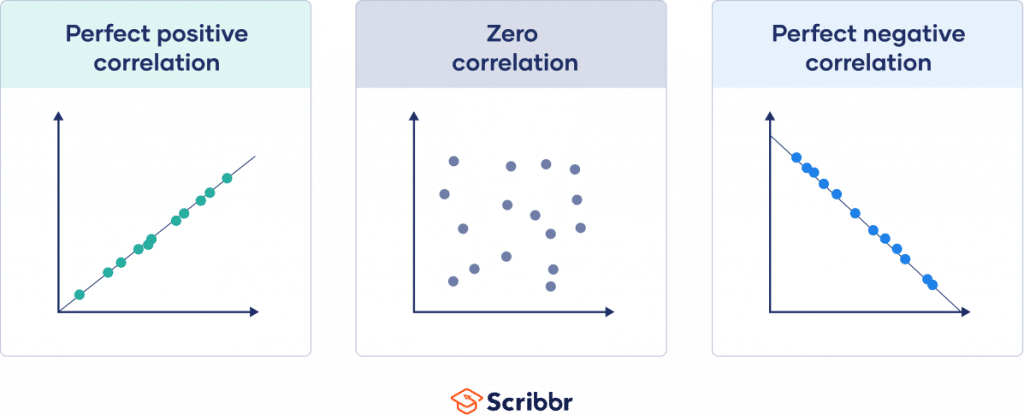")

In [63]:
df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


# pairplot:

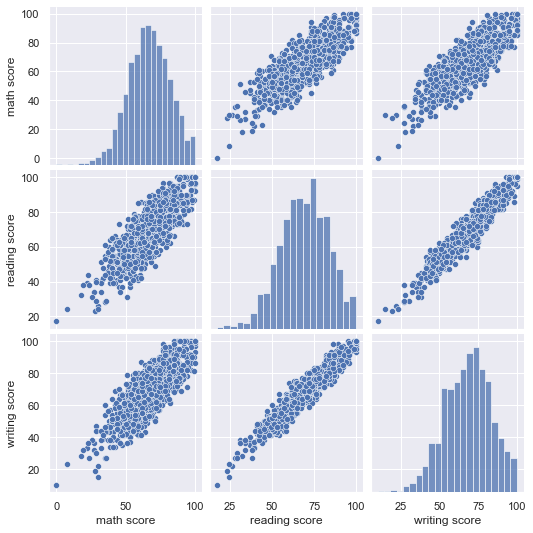

In [65]:
sns.pairplot(df[num_col])

# Covariance:

Covariance measures the directional relationship between the returns on two assets. A positive covariance means that asset returns move together while a negative covariance means they move inversely.

In [125]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://www.statisticshowto.com/wp-content/uploads/2013/12/g-covariance.gif",width=600, height=400)

In [29]:
df.cov()

,math score,reading score,writing score
math score,229.918998,180.998958,184.939133
reading score,180.998958,213.165605,211.786661
writing score,184.939133,211.786661,230.907992


# Pearson’s Correlation Coefficient:

Pearson’s correlation coefficient is the test statistics that measures the statistical relationship, or association, between two continuous variables.  It is known as the best method of measuring the association between variables of interest because it is based on the method of covariance.  It gives information about the magnitude of the association, or correlation, as well as the direction of the relationship.

In [119]:
df.corr("pearson")

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


# Spearman correlation coefficient: 

The Spearman’s rank coefficient of correlation is a nonparametric measure of rank correlation (statistical dependence of ranking between two variables).
It measures the strength and direction of the association between two ranked variables

In [121]:
df.corr("spearman")

,math score,reading score,writing score
math score,1.000000,0.804064,0.778339
reading score,0.804064,1.000000,0.948953
writing score,0.778339,0.948953,1.000000



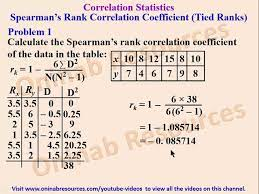

In [124]:
Image(url="data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxQTExYUExMXFhYYGCMYGBkZFxgYGRsbHBkfGxkfHBghIioiGxwpIhkiIzQjKSstMDAwGyI2OzYwOiwvMDABCwsLDw4PGxERHC8nIScvLS8vLy8xLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy8vLy0vLy8vLy8vLy8vLy8vLy8vL//AABEIAMIBAwMBIgACEQEDEQH/xAAbAAACAwEBAQAAAAAAAAAAAAAABQMEBgECB//EAEgQAAICAQMDAgIIAwMJBgYDAAECAxEABBIhBRMxIkEGURQjMjNhcYGyQlKRFRYkQ1RicnOhwdLwU4KSsbPRdJS0w+HxNIOT/8QAGAEBAQEBAQAAAAAAAAAAAAAAAAECAwT/xAAqEQACAQMEAgIBAwUAAAAAAAAAARECEiEDMUFRYZETFAShscFxgdHh8P/aAAwDAQACEQMRAD8A+wYYZTl6nGshislwELBVLbRIxRC1eASp59qs0Oc4ql1bHYuYZy86TkgBhnLzt4tAYZHPMEVmNkKCxCgsxoWaUWWP4DnOaadZEV1NqyhhwQaYWODyOD4OLXEglwxTpPiKCR0RSwZ3kRLQgM8P3qg+LFH86NXWNbHzzToqpcNQE0xfrup7JooUXdJIGbk0qolbiTRJNkAD8fbOjqiKwSUqkhI9IJYUz7IyWoVuPAuubHNZDL2J5ytsJtNXqHpK91fAJ4YEDkc+B75W1cGmM21u5JKqo8gXc52pIZIi9D+eyFHJoiiBWdVRS4TT2yaTpgn/ALzabaG3tRJUVFKbI32ANnJ+rbgfL8RnnWfEUYKiMrIxlSNhZFB5DGSDXNMpFfMVxkmk6PCEi2ltsbmZLPNvuJvjwe43H4/hh/YMNbQXAE3eC7uFfeX4HsCxJrLGknybTo8nJfiGAVtYuTIiUqsSDJyp8eKBNjzVYaPr8TgbnVWLEUN5H3piWyVXbbCuQObAurykvSNKkyQ7pO41TKSzG+yavd8/raN+b+fOepulaSHhixbaZdgJZ3WOXvcIotgJHsAed1c+M3ZpbJMk0eRj03rUOoYrE5YqLIKOvG5ksbgLG5COPli1PixNsjOtGM7XjBbuKxcIgZCo4Ng7hY/43uldFigO+MtZTb6j/CZGk5FcHc7f1r2yHX9D0/bZpWbake3ez1sRGEn2/kCgNm/s5mlaVzUOOOxNE+CXX/EMMSyEsS0aFyoVtxCkA1YrywB+V852HrsZdkZgpEnbUVIWJ7aObUoKI3/iK9/IC6Ppmm1DMxE310Tm3Ei3Gxj3csPTyEIBo17UMvy9AhJLPZtxKdxH2kCgMDVggIOQfn8zldOjs5kJ0QQ6f4micqfsoVla3DhvqpBHwNtEEn534FE3V/TdVhkfYj21XW1gQLZebHHKMOfl+WZRZunyKqr33BRiqrHMx7eoYSbwAu4KWUEN7FSDXIzST6GJJI5W3u6kRq1F2+s9Pq2i9vNm/SPPFXjU06Fw08x/BG6HsNcM4TnhJ1LsgYF1ALKPIDXtv86OeW1mZJMMVanr8Kbb3kM6xqwQlWd2KIA3g2ynnx4Pggm5o9asu7aHG2gd6MnLKGFWOfNGvBseRmnp1pS1gXIs4ZVk16LMkBJ7jqzqK4ITaG59vtr/AFym3xDAJDGWYETCAkqdvdZQyLu/EEUfHIF3xhadT2T7FyG2GcvK309O92b9fb7vjjZu23u8efbMqlvYSWsMil1CqVUmix2r+LAXX50Cf0OS5IZRF1T71v0/aMM51T71v0/aMMpB9iLrHw935kmBVHRkKSruWVVV9zoSDUiOLG1uBuJ58Y9zM6P4xjaRkdO2F7259+4INO4Ry4oFFN2D70fGdtFakt0cGao2Yn6P8KStEXDdh90g2lGG/wDxvfQyCwSpVQo/CRvyxtJ8LP3opFkRUiqkpzx2pYyCxYkj60V+C+MdRdYgc0k0bMeAAw82wA/CyjAfPaausVab4uieCGZVsytCpj3DcgnfYhPHIu/zo/LO71Neptpc9dmYSFc/wEDBDCpiDJp5IXbZ9uR4kiWT817YPz8c8Z71fwbKySok0aCR3cUjHaWhjjFURXqjLHiyW/A3pZetadeWmQAnaOfJosAPnYViPntNeMl0PUoZr7MqSVRO1geGFr+hHIOY+fXWXt/TyW1CHQ/C5TVtqSyHfJKzDb6isscSBSfcAxFqP839WWi6QY9TLOH9Mi0U8gMNoDKTyvpQAgGjQNCubHRepjURmQKUqR46JBNxyMh8ceVy9nPU1dSWnvH6FVK4Ml074TkimEwlUtvmLKwZl2zuXGwX9W6k0Stb14NcVVHwO5QI8sbjudwgodt/RPo9BTdDd6/0A/HNvhmvtakz/AsRk+l/C80U0cveVtqxo6kEhu3CYmbnkPZtT7AsDd40i6S8epm1ETr9eqB1cHhowVVlI8gg0V/DyMcYZirWrbl9RtwFSkZTqfwk8vf+vH1qzCypv69Y1AbnlU7fA/1fFcyar4SR3YqEjB05iXYvqjlZy5lU/wA1sTfm80+GX7FcJFtRk5PhWQ7SJIlcQSRtSuVLSGK2CluB9V9m6tvejdZ/glyjL3UJMOogsoeBqZO4pHP8F1X5+M2uGa+1qd/oLEY/WfB7usq98DuJKt7Tf1sMcVMb5Re3uA9/T4qzd0/wuPo2p0zsAk7MRsFbA6KKA8cFb+RvNHhmX+RW0kLUJ9T02aWBYnkQFTGSUDAOY5Fcgi/SrBSCvNbvJqiu0Xws8cgZpRKuwgKwcbG7krjYQa2VOUog8KPyzU4YWvXSml+wdCMQfgh+12xJHf0SLTbtp8xS7y//AHvl/vOXn+FnN26FvpKzByrbyizmcIxujRZlBrwR8qzU4ZX+TqP9xYjGt8FM0MUbyRyGNiWZlc9wdmSJCykkb/rASR5K/lTL4d+H20zOzSK5eGKMkKQ26KIRsdxPIar+f9M0GGR/kajlN4f+ZIqUjLJ8PyNpNJp7CtppImYm6fsH+GvAarv2vkXhrvhV5J5Ze4uySUO0ZDUy/Rvo7AlSCG/iBH5fjmoLAZ4llCi8L8mtTD3LYmIOnfDbxalZzKGCmbyDvIndXALX/Bs2j8K8ZWf4Wf6S2pEi7vpAnVW3Mm3tLEylfAkpbWQcqSRyPOkOoIPqWhkeob1er7PtzQ/rk+1XMzxH9ty/GjNH4PkYuXljYO8Tldh21DqHmIok/aV9v9TzhpvhGaPslZkuGNU2lSUfbMZaZf5dpoV4ZVPtWayB1ql/98lzX2q2v9eCWIy6fDrptQSEqdSk/PPbCHeyhj6iGbgA3QY8kDNRhhnOvUde5UoEPVPvW/T9oww6p9636ftGGYA+zNwaDTNBqNKs7MuoklVmG298hYyqjhdpYHdxyRRvxmkIzO9A6TPp9IumqN+2rIkm9l3faKEgLaNZFkE1yQT4zVFVVOz6/Qy0e9b0jTd+IyORJIY9q3QkbTh3T28jeWIBF0PlkUPwbAqIoaT6vshSSt7dPIZI1PpqtzGz5P4Yn/uzrjVyqHEkrq/cdzF3dGsK7QV9pNzV8jfJ8z9U6BrHVDEwjJiZZE+kSkK7TxSbkbZyKR1AoVvrwTnVa1awn/yJC6L3Tvh3TGNI4pnK6aYgfYtWVHj7bHYCwVZSBdnxycv9A6FHpb7cjt9XHCdxU0IUKr4A9RDWf08Yi1nw9q/rO06Ju1EkwImkXhpYXQEBSL2xuCfIugaZsk0/w7qEalkURtqJ5HCSMjFZn3xMDsNNHyu3wdxN8DI9apppvDCXgeaSGHRQuGlOwGSdmerAZy8h4A9IL/LixjQG+RmV+LPh2XUPK0fb+s0UmnBZiCHdgVNBT6au/wDjniDoWrDAd36rvSHZ3n3BHEZiYOVY2jI/o8VJ54rOdTuct5LMYNLPro0bazgGga5NAmgTX2QSKBPkg5ZzP9f6I80yzRHtSqFVZVkZTW8l0liorLHR4B5snx5xHoemauVZnhmMZ7moQB3en/xYaIe+xO2jIGA4EnAOSCybzCsy0nRtX3oHVwIkZS6maRmK1PvStgUgd1K4F7Bf2VpdL8K6r6Np41lbvLFKszHUTU0jQNHEQ3mg5VvA8XROIXYl9G6zzI4UFiaAFk/IDk5itZ8P65opUjlALtuVjPLaE6MREg0f8sN/Pi9wpvF7SdG1K6vvNJ9WZWZl70hGw6dEACVtvuqz+3m/PGIXYlmk0uoSVFkjYMjqGVhyCCLBByXE2i6ZLHqnlEn+HaPaIySdjARgFPG1SFNqbo8g+phiiT4f1HacLJ9c80pLHUTbViYzGIKvKhl7qiq/hu/SuIEs2BNC8i0mpSVFkjYMjgMrDwQeQRmUg6FqxPHM0nAMW8d6QghdM8co2VtNyMrXXO2zyAMsfB/SNRpoO1M6HbFGkbqSSpWMIy7aAKhhuDeTuII4soQlmowzFr0LVtCiicLKInSQiaV1MxiSOOdSQCtFC2z5yE+c5N0PUONQVkbe+pV4z35VUQb4Wddo4Vj2n8DjeRdMcmOyy+jXa7WJDG0srBEQWzHwB8z+GSyyBVLMQFAsn2AHnnMN1L4d1E0WrhWSxIhSDfM5CqUjUpIpUk7WjLBtxPrbjk5zqHQNXqBqVLJslRgiGaQi/pCyRk2vHpDA1e2wBxjHYyuDZx61GD7CGKNscfytQNH9GB/XOwuzG/b/APGY5uh6tzOFmCK5lMaiR6QyQRxxMDVjtujttH/aX5GWehdJ1KaxpXluMvKSvcc+l0iEY2fZFPHIfw38XZqRPJZjg0sCBid39L/rndYtKPkP9w/PM5P0LVF5WEo51CyKRLIN0PdSRomQLSmlKWDyDz9o550Hw/qlb66bur2qoSMu1wZgVIKnuoVlVSSQbjU1wMioF2S8PiPRkKW1KNuqgDwS32f6+xvn2xvqdWECE8b2CKCatm+yB+dZiYPg7UIihDGsi6XTQbg7L64Jt8xDAXtZTQ+fggDGw6LquCZPWNUJC4mkp4RLI4BjrarBZAhUWGCKLoCtWozczR6eIgljxftkwYWRYsAEj3AN1x+h/pmI1Pw3rGgiQzHuqHEjDUSAOfozxRuCFUrchSQrzRBNk+XHw70iWGaeWXa3dSH1BiW3RxBJAQRVFhd3zfjFqSLc2aDDDDIUQ9U+9b9P2jDDqn3rfp+0YZSD0mucyGv+MN8cX0YENJJpxbqOItTIVRwLrdStwfB85sMo/wBjwUB2UoMrgAVTJzGR8tvt8vbCaIxD8U/EcsC6hEUF4NINR3CPSWLsoGy7q4z7+4+V5d03xXE7BFimL75FKBQxHZmWGRjtJBAMgPB8A/KsZ6zpUEpYyQo5ZO2xZQSUu9pPutkmvxPzzynR4AQ3Zj3K7OrbQSGkNyEHzbEAn5kWcsomRT8RfERicRRj1rLpxISBtCaiYx15vdSMePHp885HrPjBASkcTM6ywxkEqBU87Q2CCbIMbcfl+NPNT0uCRw8kKM42+oqCfQ25Of8ARYkj5EmvORL0HTAEDTxAGr9C87XLr7ezMWHyJxKLkj6d12OaaSAK4eNdxJ27SO68XBBPNxE18iPewEul+NkCx9yOVi5NuqxqFB1Z0y2vcJ+1Xi7HPHjHWpj02kV9R2kjP2SyIodi8lhR4stI/j5tlQ6HSr2QdMgElhSCpQHf3lUsDW4vcgqxuU83VlBMkPxZ8QyQd9I0G6PRyakOaI3IQFG33Hm/zGS6f4riY7O3KZd7oUChm+p7fcYbSQRUqEUb5PyOHXJ4e7HHJpRNJNDLX2L7abDJGSePVvFC6PN1lHpWp0uonhMI07RyRNqQpX/ELI21A/2j5UMrcfwKCTYGXECXI16h1ztahojGSiac6hmBW+H2gAEgex5J9x8sUzfGgEgk2P8AR1gmeQbV3q0GoSFmHPK+pjXkiuL4zRdT6XDKGaSJHbYUtlDEoTZXn2NeMqw9P06gfUxg238IH23Dt+hYBiPBIHyzN1Jq2p7FDpnxPcssMis7ieVUEaXUUckce5vyMoJ/AMfaiz6l1F008koQo6h9oem5UkKSFblTV1YNHmjnuHpmnLBxCm8M0gbaLDPW9gfm20X86HyGQdd0qR6SdUVUXa70ooWSWY0Pckkn88Np7BJrcCupq+9HX+x5/wDUyHQanUPAkrTxLu9uyavdtAFyfPK6/SX1HiUafbVboeJI2PNcsY3VrA83HyF96Or0jT6PSLFHvaPURSH7NhEmDOwJI9h4HJyJlaHJfU8/4iI15XtWwvxY7nGVdHPqJoNPK08QaWNXKiKuWUEhQZLIs1/TFvR+kyR6kySm1B1Bst9rvyxPENvn0qhBvxQyonRZ5k0UsSgKmn04ILeiULKkjCRbtdm0SIy8k2DxwSU8keODQ6Kec9zdNEgVyt9jbwAOTcn45JCZlYxnURBquu1yQPcDuXX44s+IOlyT6PWxqvckcuqKK5Yqu3liAOfyy7q9EJNbA50jHtqWE/1IAZ0KEOS/cKheKCkFmXxtskiyeekyzyB5GniULJIl9kgUkrRjkyeSFs/jlp4JRIE+lwh25CGIbyOSaXuWRwf6Yr6loWn0E0ccfcc6qQqvp/h1rMSCSAKAOXv7Lf6d9JQyqN22QSGNo3TskK0Q5eNg+0EcX6uDd5bUZuZ3p/e2B21ESks6C4qB2uy+8nkhbyfSnUNJKnejAQqAewedyBufrMzfX+hzamKPsj1KNSt7uG7ktdmRbH1UgB3MPUpVSCM1eg+/1NixaWPP+SF/nlhISwImoH6TFRNA9rgnxQ+s5PHjIo9TMmpjhd0dHhkk4jKENG8KjnebFSn29hmRf4Y1LaOCJV2MsGohKFgArzOpiewa2gKeRZF/nmsnH+O0/N/4Wfn/APt02CJjnDDDMmwwwwwAwwwwBD1T71v0/aMMOqfet+n7RhlIPsT6nrRTUPF2x2oohLNKXI2BhJQCBTub6sGr8NfyBcZW12hSVGjawHrdtO0kAg0T5o1X5HCIyHqOtkTaYohJd3y4qqr7KN/vrxi/4k18selSVCYnM0KsAAeJJ0jdfUt/ZY80DjeMrEipZO1QvNXwK5qhf6Z5aVH4ZQR+IBF/rkuSLa2j3qtUENbHa/5ULf1rPOq1ojUMUkN+yRu7CxfKqCRkzyAecT/EDvJCUhmaCRiAkoAO1r4tTww9iPx+dYlFh8FbqfUIp17bRakbXSVSNNNYaJ1kQ1t5FqOPleVoNRHDHHDHFO0aM0jB4NQCXMncB4iPpDsWA4ql9gbg6d16eSSKOVGikM7RTrZKgxQCQ9o39h9ysD523+eQwy6hJkhlJmjmUywSsaUjtkvDMQOaJUq1Elb8kHNPBndlrV6xJ5YZ/wDERyRRyINmlmdfrdu4glOSNgo187B8Za6ZrI9PDHBDDqFiiUKt6acnj3Pp5JNk+POWNLpjpoYl7fIsFYvUoNlrFheP0AF0BQyr8a9QkTRvNGzwkbaJCg8yKpBuwLB/PnjMt8FS5HPTNb3BdOPNb0ZG4/0WANZ60ygOQfawP+vyxbpdU302WFV9CxRzA+K3vJGw/EfVWPzb2rHEmntrv+nm/wA8xDNyiNBUlDxf/C//ADyH4iW9NOOeY2HHB8ex9suxwheeSfmcqde//jy/6h/8s1SjNTIYOi0T9ZPV8fXyfP8APFnSunRR6ZZXl1AAUsdssp9z9lVtifwFk/LLel0DSayWemEQCBQwdD3ojOjkKwHpKyD1eGoVYy78PD/Dxcex/cc3EIzMlPQRQzoXil1NAlTvfURMCByNsm1vf5ZS6Np4o9JpDJNMncjiRB35BbtGKVVB/wD0AfYY/wBBpTHEFbluWci6LuSzkX7bmNfhWZvTdCkn0+gkSdk7aQOVKoVpFDNRKlgzcDzXpHyykGPTOlKTN9bP98w+/k+S/jkul0sUu4xzTsFJUsJpdtgkMA101EEGrogjLPTUvvjn75v2ri/4T6DJpE7by70WKONVF7QY1KtJR+yXsWo4G3ybyFIuidOQRSs0s4Czzk1NIOF1Elng/hk3SuxOGMUuq9BAYO2piIJFj0yBSeDfHzy38Oj6uT/4mf8A+pky3oNKyby1FnkZ2I/E0g/RFVf+7hsIzmmOngiBm1EqW0rffS/ZSYhmNHhRuW2PAvnLeh6Wvf1A7s/DJ/l5P+zHnnnK2o6ANXAEIC200bSW28RvO3dVQKB3hatjSmjRIrHHT1+v1PH8Uf8A6QysiKkQ07SGJdROXDFSO9N9pVVmXddWFkU1fv8Agc8LpBHroaaRr00/23Z6qXT+Nx48540fw0ya19XvAL7wwF+tWWMRhlqgybD6wbYVf4XdSP8AGwf/AA0//q6bIUa4YYZk0GGGGAGGGGAIeqfet+n7Rhh1T71v0/aMMpB9lPV9VgiYJLKiMRYDGrBYIDz7bmC/mwHuMuZj+q9Bmm1Z1DhTCHiQxlxteBA7sWH8wlZX2k0RGt/LCUkZoYplDjefUx2r5+1RY/lwpyr1vrEELBZZNj7d/wBhyNhcJbOFKqNzKOSPOUpNcJHhkVWAGpZea8iKYE8E+k/aB91ZT74v6n8PzT6v6R6CoeJVjZ32NDGJCwcbNu/uSCRR6hca8jzmUlEM025lGo1MgCKWNc7f1JoD+oz3NGHjBoGqI4uq4xaZzNBCxTZuljoXZ8gk8gfxWPxoH3yp8V6IGTRXE0qLqCZKiaUBDDIDuCqfTuK8fOsKgOrA41OmWRFJWyjBl+YIBWx/3WI/EEj3ySVVCIDSeoKBXFk0Bx87xd8F6eSPTBZQy/WSGNX+2sRdjEre4ISuDyBQ9svdX8R/7aP94y28CcSXGjsAHn/dnltnCHaTVhTRNDi6PNfjmd+KNUF1WiRpmijczCWpWjBVYCykkEeGo3kfwjHqJ4tNqdSF3rG4JZCsp3MQrkcAFkVDVfxNxyKtuJJPBpYdMqszAepqs+9KKUfgo5oDjknyTk2GGQoZHPCrqyOoZWBVlIsEEUQR8skwwBR/djSf5vH/AEwX4X0g4GmiA/1cb4ZZJCFP92NJ/m8f9M4vwvpAABpogBwAFoAfgMb4YEIUD4X0n+bRf+HD+7Gk/wA3j/pjfDEiEJ1+FtGPGmiHN8L7k2f9+d/uxpP83j/pjfOE15wIQpX4X0g8aaIf939TnB8L6Pk/RorPn0+ccZwnEiEKf7saT/N4/wCmWND0XTwtvihRGrbuUc7SQSL+VgH9Bl4H/dncCEGGGGQoYYYYAYYYYAh6p9636ftGGHVPvW/T9owykHrrYI55FcEg/oRyD+OZzpTJLNqIWMqtAVBrV6hrDruBIJUjwR4INGiaNaTEHStJAXdY9RNJLHsSRy1uVjZ9kbPtAdbZ7PLHmzlRBJ0nWpq2jNyJs1Gzb9K1JkA7EpHcjcIYmqvF3zRIxpoFSabUQP3R2gl/4qdwyyBvKkgj7PPlTfBNEA05gaWFo5GlkEqxySMPUQkGo2AttUNW5uR8/wAst/2ZHAO488u60TuO4LlVcskV7bcFnIrlmvyeMrIkZ/petTV7qMiCOeNdv0vUmUAsaMkThDESACK3A80eOdX/AGQn/aT/APzM/wDz5Un0Cx9t9zO5eJDI9b2VHYoGIAuu43kXzzjvI2VIyfTtbDNOYVM4+9Ct9Jn5MEixSWN3HqfjzYB8Zf6r0pAI/XP99H51E5/jH+nnvpmg0yzu8RBkHcsA8L3JAZqH4yR8+aII48Z3W9RikIRH3NHPGHFNwe5XmqPIPj5ZeScZKvWxHB2hc7NLJ21/xM4FiN5CSd3ioz+pGWejwRTwwzo+oCyxrIA2omJAZQwB9de9ZPqF0+pQNvVljbeHVh6D2/tX4FxyeTwVe/cHIIOt6KLTxuk8CacVFGwkXZ6RQQNfkBfH4ZOC8jrDDDMmgwwwwAwwwwCMTpu2b13fy7hu/p5yPUa2KMgSSohPIDOqkj9TibqXTJY+/PABLqJHTbYVSkSBQ0asT4IVjfFmT2qw11XT1louZAQK9E00Q/H0o4H9b/PLgmTxr+rJE0AIZvpEgiRl2lbKM4JN/ZKoeRftl/FvUukCU6c7yvYlEq3blisbRgFib8OeeTdfjc+s6ekptmlBAr0TzxD+iOoJ58+cYGS3mZ+KNPqTNE8CCRUjcqpop3zJEFLj5dvuU38PPzFsviKSGPTvJMHaOIbqVm3sRwoBDAsxJoWeScUpBpj2gUBaRnUhZ5mVO0CZdzWOVraRX2iB8yKiMc9V0kzshifao+2NzLvFj0ih6D77xz7e9hd8UaJppIFSJi8U0UyyGONoztl9alz60Krb8VfAtuVxNugnijkgEi75Y6VWnmbtuQ9zItmINHZBscstsOc0/wDd/T/yN/8A6zf8+XYm4l+DOlTwzTGVT22S03fajY6iZ2j3f5VRvDB/9Ks12ZnUaKBdTHpxCT3IpJQ3fmFGNo12lb9+4Ob9vGN+hTxvAjRAhORRJYqysVdSSTZDBh59sj7Kui/hnCc8yyBRZzJo94ZX+kc8qQD4yPUP6vUaGR1IsFzDIoGWqF/rkuVEEPVPvW/T9oww6p9636ftGGUg+GZvo/RZYGZ4kVRKV7kJ1ErxKdz9ySNmQkMQV9NKCR7VZ0mZ7442nTFWlkiZjtjeNpVKuQadu36mVeWKng0B5rCMsqdO6KdM8NehHmU9gSvKkcggn7hjd+djWvpoVtuhdZe+KejSz9loX2tEZCPUyep4HiRgwumVnB/LdlvXtZ0hsm5rsiif8PLyR7H8Mp/GMEkkKxxzCFmcUWE21yFZgjSROjRAkA7t3tXN1lnIjBd1yMEgDNuYSxhmqrIIs17Wecsxadw24zOw59JWMD8BYUHj8/bF4Zjp9MWQxsWhLIzFih4tSx5YjxZ5OMI9Q5ajCyiz6i0ZH4Gg18/lgpnulfDk2nnMysj13VUFitrqNUJ3J9J9SKKA9z8sh/u+YgxFxCZ0DRrNJLGHMrfWJvoqSGFgVz+Vm50WRm1k7ozNA0aij3V7cscjq4KScbmBsFaG1F45BLbq/iP/AG0f7xlnJIUCL4Y6LqNKpDIkm5Io2AkoAQaYR2AVo75FquKWiefTlY/D00kfqiME5eWUSw6pwUmkCkOUVVV0JG3a1kKg+1uNaPr8LPCQshjIZGsBmsJIrslL6iHClKF/a8HxkXwpFMumjE9iS2O1juZFaRmjRj7lUKqfyxPJY4GwwwwzBoMMMMAMMMMAMMMg1OrWOtwfnxtjkfx89imvPvgE+GK+pdY7TaYBNw1EwiskoUuN5AdhWz92RRrzjJpAPJA/UZYJJB1PQJqInhlBKOKNEg/MEEcgggEH5jKC9AjVo2Tyskrtu539+zNfyskNwK9IHAyWXqtaqLT7LEkUkm/dyO20YrbXv3PN+3jFOt+LtkzwpCzlXMQogFpPo51AAviio2/mfljIwN+j9Eh0wIiBFqiWTZ2RLtjW/koJ8888k5PqOnwOd7wxM38zRox48ckXxmOk+Pt0AlSJSrSbO47SrEoCKWMjJE7RFXfZTgA7WN1jmDqs4eVHhiMaxPKrCZi5AIChl7dLu9RBBb7Jw5GIGWp0atKmpBJkjRkUWAtOVLXwT5Reb9vzyPoWj7MaxryoLMx8W7sXcge1sxNe1gYs0fxEGh0r9sk6ntWoYVGJluya5+Q45r2o0+0R8g/9exzMvBqFk8RrvY7r/K6z3qkpRXgf8c68LBty1z889xRHndzf9MylwVvki2gi2b9Bxkpc7RtWwc6NOv8AKP8AzyXKkRsrwRHcWIr8MsYYZpKCNyIeqfet+n7Rhh1T71v0/aMMpB9iz4j6o2mh7qqG+sjjIJI4klWO+BzW+648ecZ4mMsGuEkRWQrHItkpJGheN9y7JCAHAZAfSSOBfB5IhZ6r95pv9v8A/YmyHR9Uc6qbTuoG2NJENOCwZmVhyKcLS2yny1VlcdVjneAx9yl1FbmjdFb6iblCwAcceVseM9avSabTKGkMihpEUN3JnIZpgyKCCSiGQixwp4B44ygoabrjzyvFIhiMc8ZVGjkRyhkYK9t6WU7fK+93WaOPXRM21ZYy3jaHUtx54u/bKGq0CRCLbuJ7yC2dnYDeWrcxJqyeL+Q8AY1CDzQ/phwFIs0OunbUzRSRKEREdJFZj9tnGx7AG8BAxA8Bh8wSog6488rxSJ2jHPGVRo5EcoZSFe29LKdvlfB4NZe0Oh0zSTlJJSySjvXPPtWQbJqAL7VFbbC8UNp4FZDo5YZY45IRNXeRQ0yzKxHc3+nujcUtuD49vahSMtfDvxAuqVnShah0Q2HMbMyxuxPFPsJAF17m7AWaz4k1EUUrvpwTHqO1viWWaPthA7SEAB6UntmgaYH5GvWkbp6SOse+N4njSvr4z65JFgVLoSRF5HoC0/QCvcS6SDTLqFknaH7xWEupmaipBtbZtgBJKkUDZNEXjAyaPSSh0RwwYMoYMv2TYu1/A3YyXFem6vBvjgiDNujV0KRSNEqFbS5ANicDgEjyvzGNMyzSDDPE17TXmsii1AC8nMyagsZHNLtGdjlDeM5qFtT/AF/picYHOSFpnq64/TPGq0sMqhpYY5Kut6K9WaNWDV0P6Z5DMVoCwMg12pkCKIY9/wA/wqiPceecym5K0jzq+nq4hO3YsEgkiCUoDBWQemvs7XIr8cn1mjjkpzEjH3OwFvw5q8rxayo1aSOQsbtV20v4G2H/ABxP8X9WnjiUwBox2Z3HAvuRxBoVrkGzuO332++aUvEkcLgeHRxNMk1MrojRrXp9MhXdYq7JReb4r88XL8Nac7klVntdrFnYliYTAWZvtFzESu6/f585667r5PosssTqZIyEbYd2xt6iUH5MoJNe1ZmpetaruRgklBOUY7RvEf8AaPaiZQeJgyKYyPKgh+SeaqajLqpRqtP0GIvIQXqTd3fV6ZN0axkOtbT6UHgAjn+Y3dl6WCZCpruLsY+4UA0BxVepj+uZ3p80zfSTLO3aC9+OXTzhkKBpLjUFPq2BUA1d1xVEZbi1U0GpghkleWtDJJInpYvLG8QscWWO5gBfvltF3gtL8HaSoLiDHT9sRuwUuBF92C1WQPlj4KB4A585nvg/qUk51XcLEpqSihkKbV7MTBQCAeCxPPPN++aLDQQYYYZChhhhgBhhhgCHqn3rfp+0YYdU+9b9P2jDKQfDM90r4fMDM8SwRtJtEyxowibaW3MI93pkIYDyfHN5ocy3QonjmnlXTyJHqDFS9pEkSSmWQMAdpRQEO/kkseWAFVGWc6d0NNNJEUWOPuSrvjhBWESLp5wzon8BYEAj/QHJ5ONviPprTxLGrKtSxSW119VKslcfPbX65nfh3o7ad0FExyTrIrPDHFPuOnn7iS7FAkKkA7/fews1eOPjbRJLpnieF5u56AFQyFCQR3NvzUcj8a8ecvIWww6t4i/2yfuy5ItgiyLFWPI/EfjizXuFjg+0PrI+G5Ycj7X4/PL6alTmW0bSM/034cm0/fCzLKs8lsJ41b0iARAFYwikllW+KKiuCSxk0fR006ARqiK+ojcxx320b0q2wfwgld1CvOVuhB4YZkaKZTJqdQU2IAyozu8bDdQAIoDzyVBrnKvw/oBpohEAO39JjaNuykMhUhL7iIqguDa7qBIAzTfZiC5P0eWaVzI0IYTxSoUV91QSb0jck/Z2lhwPtSFq9s9w9Enh0g0scsJQRqhLrICbLGe9reGsBaorZ5JrK3R0WGeeSPTTxLNIgI7e1Tt3Du/aslrLM1XRS+bxNqfh9JI5USKfTpNOJNv0eN41KxbFLQsG3KSgdjX2mHPF5JLBpdN0VWninZYFlj21JChRmXslGjbk7o7NrZ4CqKsXjyRmJIAoD3PjKGi07JDDvRI3EaB1jFIrhBYUfygggfgBlvVP4s0pzm2zaS4PenlNlTkUCgOQfbx/w/3YIPUCg4/6vJpNPbXdf+eRSzWERIKkof8AXF5cyKKAKb5J+ZyXNUoy3JX00ZUnjj2/4Z7XTgNYv8vbJcMQhJzYPNC8CM7hlIFZXTUxmQxBl7iKHK/xBWsKQPkdpHHyyxma6l8MB9fDrlZt6DtOu8oO2A5sUPUdzC1bgi/cDKiM0gUfIZzYLuhfzrn+uesMhTgGdwwwAwwwwAwwwwAwwwwBD1T71v0/aMMOqfet+n7RhlIOp4VdSrCwfxI/HyOcqf2PD/If/HJ/zZfwwBJ1Do8W+CkP33PrkPHZl/Hjmsu/2PD/ACH/AMcn/Nl7DEhIzOs6VESnpP3yfxv/ADf62MNV0WGr2Gx/pv4/8WWpRsbd7H/o52SbeKUX+X/v7ZicQbjMlGTpEJQHYeD/ADv+X82Veq9Jh7UZCH7xP43/AJqPvj9YvRt/DOxR0Ku8qkjg+b67UsjSoitLUkDQqGG6WKUSbxC4O0t9UxAceEPqNitL0DQRz6SCUgMzxK5YNKqkleSATYGOtP0qCNO3HBEibt21Y0Vd3m9oFX+OWUQKAFAAAoACgAPAA9hmm8GUslbTdNjQUARYAPqY+PzJrLarQoZ3DIUMMMMAMMMMAMMMMAMMMMAMMMMAMMMMAMMMMAMMMMAMMMMAMMMMAQ9U+9b9P2jDDqn3rfp+0YZSD7DPN5Q6pLOrR9pQVYlG4JKk7Srk39kAOK9yVy003OCNjHDMzD1bVtsH0Yrwu8sGINmHd/CDuAd/HHpPmuJ9R1jUrI6DSMyqfthvtKDztFcnay0PciQfw89fgq8excP8Mzida1NrejbnhqYnZ6ijE8WRYDCvKm8lbq2p3kLpSVD1ZLglbPttokgBuOPVRNg5Pgq8exch9hmaj6zqgiltIxJ2jgsTytvuAShzx8vyzxp+s6wRAtpCzKBuPrUsfqwSE2e29yQLvt+m7419erx7QuRqMMzj9c1XNaIkgsANz01AFaYoAPJ5NA1S7jkn9s6k8jSnbvKi94Yi32nbs9NhV5NAb+arnPwVePaFyH+GZ/T9b1BVy2kYMIi6KO56nBakJZBtsKPnV/iL8T9b1QB2aMvXIsyJY7TP7x3bFQoHkFhuo8Y+Grx7FyNHhmcl6zODuMPAdYCl/wCUdmAYErZSu0f9WRjztzw/XdWY2K6NlkKnYDvI3BLpvSKpjs9g1EqaOX4KvHslyNNhmbm6zqd6hdK20NTelwGsuFoleOAjWaA30SKOTRdX1JiD/RCG3bdm42LFC7UGgxALCxtDMCfGR6FS69lvQ+wzKv1rWKb+iswCUR6uWIQhiQnzLLSg15IFZf0nVdQ0yI2mKoWcM9v6dq2t2oBs8XdHjbfJFehUlOPaFyHeGJh1LUCbtmC07hUOA4ASlIN1tJ5JJsD00Ocqz9Z1S2Ro2IDFKs0a438KTtJFCr4IYiryLQb69i5GjwxHp+rag93dpGXtqSvJPcIoAKALNlXP+r2z/FQr6fqOrKSyGEqQitHGyk0SiF14AZiCX482MfA+17FyNJhme03VdUHRH0xIaRgZAWAVO4QtjZwdnq549IBNkHI+o9X1YEnb0zcCRVPLAspXtuAFJKndx+TXwLx8FUxj2LkaXDM6vW9Tu2nRt94Uu25AYAHhCBakvf2eNt7qySbrGoEcbLpGZmjZmW3BDC6X7PF1fqom6AJ4w9Crx7FyH2GINZrtXUeyEKWZlf7TUVnRVN1wjR72sjx45q+6Pq2pYtv0rD6oyAWfthVIj3FQOSSASb4NgDHwuJx7FyH2GZh+tatBI30VpBdxgB1PCRekqUDAFmaiRY2mxQyw/V9UGr6JYs8h2vb3FRatK3Uxc+wC+cvwVePYuQ/wxP0TXzSkmaFogUBVdrUCGcNbFQbICGj+l+ccZyqpdLhlTkQ9U+9b9P2jDDqn3rfp+0YZAPTnDhhkCO50YYYCODODDDBQPnPeGGAGcwwwQMMMMFYYYYYIgwwwwwwzuGGAcOGGGXkBgcMMjBzO4YZXuUBncMMgOYYYZGAwwwwyAMMMMqKIeqfet+n7RhhhlIf/2Q==",width=600, height=400)

# Left-Skewed and Right Skewed 

Left skewed :
     Left skewed distributions occur when the long tail is on the left side of the distribution. Statisticians also refer to them as negatively skewed. This condition occurs because probabilities taper off more slowly for lower values. Therefore, you’ll find extreme values far from the peak on the low side more frequently than the high side.

Right Skewed :
    Right skewed distributions occur when the long tail is on the right side of the distribution. Analysts also refer to them as positively skewed. This condition occurs because probabilities taper off more slowly for higher values. Consequently, you’ll find extreme values far from the peak on the high end more frequently than on the low.

In [123]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://www.statisticshowto.com/wp-content/uploads/2014/02/pearson-mode-skewness.jpg",width=600, height=400)

In [31]:
df.skew()

math score      -0.278935
reading score   -0.259105
writing score   -0.289444
dtype: float64

In [32]:
# left skew

<AxesSubplot:xlabel='math score', ylabel='Density'>

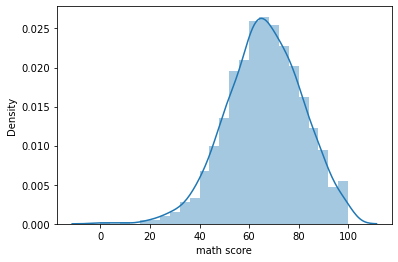

In [33]:
sns.distplot(df['math score']) # left skew

# Central tendency:

There are three main measures of central tendency: the mode, the median and the mean. Each of these measures describes a different indication of the typical or central value in the distribution.
1.mean
2.median
3.mode

In [119]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://cdn.scribbr.com/wp-content/uploads/2022/01/normal-distribution.png")

# Mean:

Mean is what most people commonly refer to as an average. The mean refers to the
number you obtain when you sum up a given set of numbers and then divide this sum
by the total number in the set. Mean is also referred to more correctly as arithmetic

In [2]:
Image(url= "https://www.wyzant.com/embed/editor/257563?size=full")

In [35]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

# average of three columns 

In [36]:
(df['math score']+df['reading score']+df['writing score'])/3

0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
995    94.000000
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Length: 1000, dtype: float64

# add average column

In [37]:
df['average'] = (df['math score']+df['reading score']+df['writing score'])/3

In [38]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


# groupby

In [39]:
df.groupby('gender')

# mean on groupby

In [40]:
df.groupby('gender').mean()

,math score,reading score,writing score,average
gender,,,,
female,63.633205,72.608108,72.467181,69.569498
male,68.728216,65.473029,63.311203,65.837483


# Median:

the median is nothing but the middle – or “mid” – of all the values presented in the data set. This shows what the middle of the data is. For example: in a data set of 5, 10, 15, 20, 25, 15 is the median. 
There are two different methods of finding out the mean. They are the odd number of values and even numbers of values. 


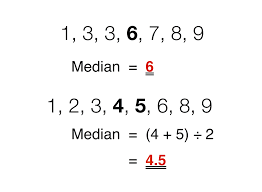

In [41]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAQYAAADACAMAAADRLT0TAAAA6lBMVEX///8AAADUAADz8/N4d3Xt7u90d3mDhITBwcFWVFLGyMj19fXt7OrJystlZWWRkZHW2NpNTlCoqKji4eCioqKysrJlaGzm5+bR0dG6uLeIhoQTExN9fX0rKytjY2P88O43NzdFRUX44+ALAABwb26Zm51TVlhfXFqDhoiRj40AAAgcICNOS0htcHLlfnbZJw/oj4gUEhH1zcngZV3bJgAADxEyMTApJSMPGB0XDQUgJSgfGhYtKSY1NzlSTks+QkTdSTricGjbPSvoi4Hsop3gXE7wtrH22NbjVknrnJbdOyTleG75wLsJHR5iOqtnAAAL6UlEQVR4nO2dCVfbuhKAPY4DTpzF8dLYwQkxOKR5pQtdwm0pcLvftvf+/7/zNJJ3ibacBgfKfOdAyGCCNBqNZI080jSCIAiCIAiCIAiCIAiCIAiCIAjinmONrW0XYQMctiWRfwowCupScw1wadal4w6wi92KzD0aCBa1awfs2of1T+glTBptWZVdkNQQQd/qOeBXpR6YrVYItZq5IBiXhb2Fh/iHu7Vro7Hldv5X/wQmtWP4jTr8Lm7ggaQGV0icasF6wFvcrBWX2Y3NhHCk+HT/svp++Zi/vPYq0jNhHm9r+m2SpLNcSmqYiCq50CpLnb/4i1Vtd6YANJrJbCZ/eFBv4NfCvpKoLHRBdAf/zbVKvmlakhp8UdputRamaMOs1CkGgGYFkhvhMDOpshT1P6tYQ2ZektKapSf7Bs4YPIXUOq16uLdw7qNrUFxrPK5LXG45UbW+/fStWTWzplGqwTo9AUcWz89gWJUA7AHMVXqomQ3HRo29qcot6PPXJbjS9Q2itoYgWNRrzKUO7FQkrFozNGiQTHq5U5ewBvfctm3UOsuKm8FwJvWhRrmqU7DmVHX5FoTltydiqEygXomeXCsLxKRjUhsxVzDvwMy6bdbgpIJOxQ34aSmrXf4CuO2voK4z75X0nzJn2Kp7AcsMx0zr1yr2ppHVkDaallTUkPmKSWVoHIr6d6TZx4U0WdTCzApqY64Yl73zaxR682RqsHLPdfFAvKL5F1IjnQvx4c4q/hoejdkEEy7LUq3QZUmaTsuEVRTXpvpVueQGydRQzGZt7vat46mGnT4r71jcDAzwskXRnsN0Ms26jF/qGL28pwdF/ZZv2tnHu4UDdvily0cbrtc1kdWgBScQz2GAPxZq0Ny3KD1CEx6WzNpBJUzRH/olrxjkfxeU7k0imMZiJHZL9yYrWMcwui13qWUXNe4HabHOStJeP0jn18dlT2AHqVIM5ZDnlW/R7H5qJWHpFsIK+ludOpVxIpXUVN0yaa7SgntKX29Vb00y3t6aileRJ0vIQmmrjnKqESoH/q7yhsOW1i0IgiAIgiAIgiAIgiCIe4lyDe1PJQERjYqgHoiGrjZPrvNRB3/r+pNNlathojQYC1BfmoW+Zqo3MKjZ1/V37/V3GytZoxhL1uq422CGkWjLFNF2q2ujGlq4MOuGeIHmau0fa+WD/lHTPn266QLfDMZsgjE7IxrsYODlEQ9Rmxi3Z2qIIwxTxicQaC2YwCkotvjkfNP39w+aKvamMY5s7BUQLHc0FwOQE/YWI2wTpobOLjMT5ioHR0wNsaaFpcCtyQn7uUDXP+n60zuqCGOE0dc+aJ0dLRqhBGyfuwuhhhaGV7gaAgzBFPGpeA8p7YTT9fefX+hPGy7/hmBqMGZasoNquBDRWXPCY+1CDZq3BtibMTW4VTVI6DqzhJf63TQHpoYAeJWZJh5Y7Xbb0iYY007VsAKzra2OZDXYAacQPNXZt/f6l8arsAmYGjRIWC9galhhZxhD20QX4Ao1zDGsf6FQw2thOsUmjSf6Zxw0m6/CJkhi9IZsRDh+zGo5s01gA8fput89YQPpccR+1w1mcD62ftopmArY/OlZc0XfJP6CNTxG5jEO3xrAFAPvVgJze+VqXsjmVyfnfjteaAYOEsaP4tEH797/87GhYt9agoXnOI7nbXcPz9YJUAsM/+eX/smYkUC9X+Le4IpppdnddkEIgiAIgiAIgiAIgiAIgiAI4pbRVzxGGXheX5baSqmGmzvqG3/SdXnp+cruwpEDnpa58BXxP3PhNJjEAaSyWnOIIpASSVyAEU1VYVsP6vt+rPSR9dqTub3DvciAUe3PfbjcTcRD4CVMiHcHP9xPtFEWIIVSOjF+T2p1SLh0KD9zjDlaHlRFgVoNIgfK62oyB1e0w1k1sBXwYrUOGwl3eTEral0N4/QJfKj0gOxZftl4QFaDL2d30fIUWrWcWatY/MlfFWks6t9M4qOxbbuSGrJiViuslmqYlOexpIYJqLJxzNPn8qu9bSU6SVhVQ9b5Gkt1I6nB9ZUlEMYQ1DMXebCnSWo4hh1nfTKqaYx9YH+4qNfLFU5oXe0qmWeq56K7MWTfIJj8JYnsYAi1scJGVyqpIXMNlcxuPeitzyeyiwxh1/FOa7uS0+q7yrRbN8EValgpUg4lMYxqjXmI6TjqahgD7JkuG0AqqW5cWPO6rWvu3z8ZGYN6bsSVaIRlPQfhjaFUQyu+IvGSX81ltORDWl0NbdPE+i+q6cDG6VVuNbePJ97W07nMH5lud/5wuU01+CBn7UqJKjb9GtOfyfYvcAHKKSLzXFnVnFmZz637XucS4jDLI3jzKNQwUPjnLO9TWBnCIKc8wHsPd9HEg1py0Ow/nZWrZmUdJ1Z6ge2NFFoyVVw2STM9VRNT9RFW3aOg3IciYRyd2pzkWFhMbQNhPjRW2j0S14aNZQNLi2pGRVKi4pdBlDk5WzgFC12iHVXbSPiGXpSNIsxFQrKI+TZRK8qNPa2TgVqeFPmfxAZrE3ejD/Ou5acPdDQ1UGRq2M0nBAab+CNJF/1X3soLGGJOQJz7h7V+LO4p3CK1VSg6ytTCYbLoLh3w7X6H94LiHsKCc9PuR/wjDwtTm78y7VCZjfVmGIqK9s+yx6j8xVDAmt+el/ZDG/PpQDxMclxVw3CBTq81K5quvVjGM27lVlLyGn7nNBYNviqNmk5nevmQDxfeuiQdnY62sI/wRCldK58x6yhH04kyb5Gj3BralZPlMdzG7iivwlCW1lOWNlSWNlBm9evtKf+dOg3WydbTYKnTZaql6qcQ1dIrsrupxbclFRxBEARBEARBEMQGMIdiISkY1u+dJ67mXy8PcE+s7vaUi4oWh/2fK/62v9XzGYw0+HYhrVBDl6exuAbpEo0UpeEkacD3ULmAYaSJ3LeFMeUrZS2YSmpQ73C4mr44eSBRx+jXzth1x5oWqtYqQlz+vJCDZ41hPOBrZc55gmpYzWO+GjYcLcdMDQv2xh1M8Qpr0I7myx8arlh3D99ExbJiu1isy9u6tFqd7ztZouaCLZqDccRPVJo7eNjKemry01k64DjA1HARMTOJAh8esld4GP7wLC6e2gB3BewWaiiWvlvQX634ivdyt5Bl62A+Wp551fkpDWCM8MSqHrQ6O2JXgg3tAINsdprbBTv6EPM3eLgcX7TXxRQ5LTqAOAjq1NNK1mCXTn2AqMNjOoviICuzvBJn16PETWKMcDOCM8U0FrPYDMMQ+gseZEyTmmiBPzxBNdjV8Evoc4qxhCsRjwjL1NC23RBs2+brbS5+FD/CITtFjf3GZV+pBViGlHiqSZganEfa3EM1HE/x2L7EFmEroQYXwzGJIpuHBFavB9FwGK+HYyHIT/LIwF6QqqGX/lZ4DxPirZ7kw9TQgoD1SqaGAW/GQFuUMv10UDZRqMGYcYr1bIxUtYzIiOKpkVWp6BTCbDBS4ykcTNDYHo8rwNwux3gCDVMDP3CMlXKMgeihUMPxA2y4B7IaPBHoKRb787PyJirfMMFQ2YT3m3xaYRnZ1oGLHT69uqE6/gLJJXZZVpn4MRbzaIrTBQ8u10di+tSH8xgmsPh5bpc8Xh/FuagUJI1hdMKjh29zzRUjhepUyUZp9zSxU6uHvsp1QuHQHFMbW1w2Zj9qXVfs5vph/10NSh+ZUqpYID67pzgMThsLfqcit4dfGveNPz7dR/gLA7/6oJs/i1+4SWxvb6ZIEARBEARBEMRtZ//58+ynA2Srhdke73R9X/z0QkfuZrLl3+W5/jRTw98vv379+mx/u+XZEi8/fMvUoL/YblG2yFdde5mr4fuHF3c05fT16KznjHWx4LSvf8zVcMBdwx1Ny38tfJFPuXim7NM3LVfDl+/P8MCKe5h8e1//58mTl/qLYnT4emdPsrkGxoCTR6329ZeIzmcOH78/x1Nc7oF3WIns2tWHMrFTPNd17bP+7ctz/Y6eVfH76KkaxPTp67aLsy3297NvB//+ey8nT/i4Orx6lX/77z/2cp1zsf4QWgq2Xabm8UDBPbQGgiAIgiAIgiAIgiAIgiAIgvjz+T86M7bpBTTkVAAAAABJRU5ErkJggg==")

# method 1

In [101]:
df[num_col].median()

math score       66.0
reading score    70.0
writing score    69.0
dtype: float64

# method 2

In [118]:
import numpy as np
x = np.median(df['math score'])
y= np.median(df['reading score'])
z = np.median(df['writing score'])

print('''median of numerical columns :''')
print(x)
print(y)
print(z)

median of numerical columns :
66.0
70.0
69.0


# Mode:

Mode
is defined as the value that is found mostly in a data set. When the frequencies in the data keep repeating, the mode takes place. This is mainly used for taking out most of the averages. For example, if you want to calculate the average of how many students scored the most, you might want to use the mode. 

in statistics the mode is the value that is repeatedly occurring in a given set. We can also say that the value or number in a data set, which has a high frequency or appears more frequently, is called mode

In [102]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://images.twinkl.co.uk/tw1n/image/private/t_630/u/ux/mode-definition-graphic_ver_1.png")

# method 1

In [105]:
df['math score'].mode()

0    65
dtype: int64

# method 2

In [108]:
x = stats.mode(df['math score'])

print(x)

ModeResult(mode=array([65], dtype=int64), count=array([36]))


In [107]:
arr1 = [5,8,4,3,9,7,5,5,3,19,5,4]

from scipy import stats

x = stats.mode(arr1)

print(x)

ModeResult(mode=array([5]), count=array([4]))


# Measure Of Dispursion

1.Variance
Variance is expressed in much larger units Standard deviation is expressed in the same units as the original values (e.g., meters).

2.Standard Deviation
Standard deviation is expressed in the same units as the original values (e.g., meters).

# 1.Variance:

The variance is a measure of variability. It is calculated by taking the average of squared deviations from the mean.

Variance tells you the degree of spread in your data set. The more spread the data, the larger the variance is in relation to the mean.

#  Population variance:

When you have collected data from every member of the population that you’re interested in, you can get an exact value for population variance.

In [133]:
statistics.pvariance(df['math score'])

229.689079

# Sample variance:

When you collect data from a sample, the sample variance is used to make estimates or inferences about the population variance.

In [134]:
statistics.variance(df['math score'])

229.918997997998


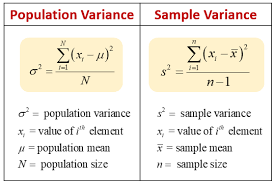

In [124]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARIAAAC4CAMAAAAYGZMtAAAA/FBMVEX/////8szX19daWlpra2uVlZX/8cn/+NHBwcG9vb2oqKhHR0f/+u2kpKQAAACTjHa7AADh1bS/tpn//vvx8fH//PP/9dj29vbKysrl5eXy8vLr6+vS0tLBAADe3t6zs7OLi4udnZ1zc3ODg4NSUlJfX188PDyOjo4sLCx7e3uYmJjw5MDz19ehmYFycnLuzc0bGxuupYvhk5NSTkISEhI2NjbNPT355uZ3cV8pKSnIRkbgoaHXhITFGRnJv6GEfWnXc3P54uJqZVXptLTSYGDtwMDmtbXRa2tDQDbx0dHOU1PINTV6dGLDJyfDExPei4vhpqYjIRs5Ni1fWkzte60LAAAbTElEQVR4nO2dC3uaSteGR8TNaUvQTTsgyEFQgxo1rcbGNiampmmSJj3k//+Xb83gGYx4SNv3u1xXdxNxmHm4Z63FzDDsInSwgyUx1WT+CjP/Ah1miETwa5m/wGps+c/raIdIePHPeei8/Q06pPAHn/2zMiYmHJAs2wFJxA5IIva/h+TH4+eFz58ffyRu6d3j3fpCmyPpPd6uLXP72NugxkUkvX7/7OzT6vPfKR+nUlo98vldTCn82Cc/vj825o+OlJv1cpaR4O9nZ/eN+LKhNZSH+U+PV+THp7PhfJlHJUFvTG0RSUN5vDpT+nhV6TkknxXiIIXYYo9KC/6+KC7Ug+PLLtoykiulf1X8HF82tIZyNvep91iEnsLFh4UyiZqe2jKSW9R7KDZQa9S/h0v+/NAb9T9BwJy10LD/jiK5ga/eoZvH4sNZr3X2BQrd90fgAN+vWvf9kNhHBc65U67wJ/iqgQqjd9/7w4/9BvoC50KRj/dQ/3coeHPfv+2RxkatWCT44qmHehg1bvv9K4zuzm6u+le9d/3REBX6P37071shEmh5dDdm+JF017vCVb8/gnPPPt+eoSvo5Hf3/XtQeXX1pX9PGH/skwsjAhYcKhYJOis2Wkpx9ASVf1SK948QHN/B6RvKFUVSfLh6UL60wJlGvS8KwfQ4KsL3t/QcKqynFBE550YZjYqPuPdULPaHn6BM8YycC7qL9xfKZ3SjXIyKd43i4+1FcRiHBPWVEQmb+6fbe2j+RimePShPF33lHvWKF8q9ohQIkjuF1EDj/Q6+gvqH74qjkfKIhkrx4gydKfiueH/7BEX6xSKoHYK6h5ECFZ7dFp+WEsUSkuJoCJeIR+D5Q+WJdndDuYDLniHpNXo/4FcaOATJxUUPft4Cks/w/RdazwOgeXyC+oa9frHXuyiCExAkw0bvI1TxSfkOaj6heyjWg08/6NE4JK1HAA2dfdcbQs64gettFJ+GvceLHiAZQps3Q0ACaao3jmn8UOzhpzNUaAyHjwpBAhd8phRI07dKAxjfUCWk04bwqQUnLgXmMhJFUR5aGJokGQGQQPFicQHJFSlzhX4QCV+Uj8MidEuvOEKkwR/jdAs/h4TmGRQlSB5xiOSWnEuQfEYtqOOBNANgFFpjHBJU+PEA1/zjCep5oBiHxT7CZ1Bp8YxE6BeC5IJUq3ynJ3xXPrdIeD+SQ2hIMw14SY+2AkjAHd8RkPQOoNATl24Ry0juhw0MtwziTIDiI3EF+DkXOA2l3/hCkVAv+dgDiaBzgiTU1VMe3oGjjeDre4qkR5C0wKsbn+eRUGcfFW+Gw2EvHgnJlQpIaPWUKRKMz54AyQNJ9xTJo9KY1tBQRp+KpP9/9B4IkocQyTvl0/CKImkQJL3wPvVUJCcuJd+YXIJIMH7qfVdGgOShQX7+gJDuh0julFHvisb1bYMGzgN4Clz7AhJQdHFB/r6BNDxDcqNcgffOkNyCznfgubfDxve7OCSFqy8QpQ9IuYDQmkeiAJLi9wZhAUg+KVfDxqcwG4EHPUEnwT3iS3EOCUQn+OwEyRdUVD4PqYBe62oNklHYy8Tj+wWCRFGeGnAXUpT74i0NnD4cgcspgM8NCZLWY+j2I0gM9FZD7DN1xxsoc0HUPxXCwIFqSba+okhu0fCBODMmPl1sxSHp0UBuwLlKsfgYIlEeMCacixePpF0yLinQAB0PX74rxH9/KKRpKP2ISGorNJ5I0w1QMKRIiDSFXpdSfDG94ta4XnzXIt0GuaRBhmQwMLuDXEnHZ/BV725IDrXC8Vrvjp41bOHwc1hRq0CPNXpw+O5u/D0cxlBkCF/i1nB6aqN1Nz5vOXCgwB0Z3dy1ho07VCDn3MEZ8DsELFUbSr6b1gCFWpjWCU1Dfg7rp1dApMCZocphi1wEnjsxHsmy0VzyOy35gL63NBzbn72M5PNFgkH4Pi05ksLZ6JU0HGbCETsgidgBScTGSITjcvpvMKnypxWk03/bCr39pxUcAifGDkgidkASsQOSiB2QROyAJGIHJBE7IInYAUnEDkgitgbJmzf/voa9+W+FnGUk/72SgJfUvITkv7ep1D+vYqlU6t8ESN68moAlNW/fJEPyb4pIT2JcwnLz9k/qTbTJRSRvk9bFcdsoWFDzNgmSt8mA5HJcLr+djhgm80gSCkilBpf5b9spmNk/b6fRsxLJvwkF5a5Tg9MtdUQzyhySxERS9Q/1yy0VzGzmJ6uQ/JdYz2VuUN9VRQySN4mr4U5yW3fKvE2cdhWSpE6SGuROB1uriLjJDElyJ+FOuC0kRNPPpINWIUmc2vLc0WCz5DYr/U/ktjNFkthLaYWbZ9fB5UnkpP9eRpJUzekR+MlGYiAfT36NRs6mSLh520TFgPsaOfbmRSSJO2nj21/99MPMy1cjeZMsbo6en5/fj+06TGlrb3/5sNzlsvJ/1iBJpCjSRWvybJ0j/+WOpmJ2RpKT5W+5AbHcpUxbP1nrs/T2xJ1GtO4FyYfrb0ehXZ/CZXL5NXLyJGbmxeyMhAMm41TGfagTCacr3XbSd1z+iINykXjfBxLQ086F7eTBDbnBajnjE77VodSclJ2RQHWyPE5OdCzwvNJRIe0RI1n1Zz0FfrVcYD+BM5B/1kM9ZGBwvc5nucEll3s+Opke2B0JXOmUCdggTJrEFyLdM41w7jof13d7QQI+KP8KuwW6P/d1faqVUwu3hj0gSXFH0C+T30+uSeU5GBecHi2ryV3muBPiJNzRt9dDAhrk99NfP9CG6nFZth7+x/1adNd9IElxl5N+gf6n95HBh1+5o+flyx48Pw8uiUbuJLbz9oSE9NH1+LcPpF/qz+3U88/lFuu/6lweNHLPi+lmL0igZXlcLfee+gZXhwPjhuqhpWjqy9Oj3GnnNZGQPhpH5nPoql8/jNPLnJj8NUcDmHs+eg0kp9fjWqf1f52gr59So4OV+s/w5sTlXxnJ4MOCHO5octUDKoakXIKj/mte8tj2Ezi5X9Nfr2mW4PLfSNiE1z8bNp2GYQWBE3HjfSLh6u8ncfztiMo4+jVpb6ql/hXihkbxawROXa5PWzwCf+E+/Mrn5NN6bmHuxT1/HQx+0jERLRW1vXnJ+8kdMHTfk3zqZz5XX8iiXP5nHdSAv3A/c3tHwv2a1ckN3hOvARYwaj9azPKD8Cix6+iUL7W/O871rCvoTfg0x0Hbl4s3/m+np3W6pFGXF7XsY1xyPXW8HPXH8WHwheiNb1zya+wAak/jkpMJ71wOIicXNspxC4tcZIAWDp24wcm+kXAnk+kbR+Yu3NGsMyLzuskpudi42dPoFSofGwyDUvVp7vyw0Ob7SRhxy+uBu89xBu8nCnLPlPe3iZvkrledcxk/6N8Lkrp8cnpC7X2bDMQm69L1xbiZfjhZ1rIzkro8ZzSG65Ppwspli9Nc/Dd7QfJzJie8D04zf6Lr2QOS/Mmc1ZO1varA5khilq22XdKa2mZIYhrZelUtxjZGwuUuVwUn3OC2VLERknr86tB4KL8rkG28JBe37hwOQAbPW6rYBAl3mvoakxe5fPj36v5KalvkEi6SHeHQKfXYbZ8sbRg4cc3kqAKuvvPzvm1yySCaqYHS6RHktd+CBG5oMdEBd346rfutSMbJa3Ad8wDpW+r06Og3ICGpon4asxDD5Qccudts7agzS44ExkDyz7Z8maqPb3Jz2R0GAZTWtw2fbk0sKRIun6/XT44u5xVMFqEHHFmCyMXlmc0sMRJu8DNfP8rXpy2e0FXdXGrpDriRbYiEO/lAFqEmT0byoYXfjXXVdyayARKYvIKjzOmbXFUuv7VN7qZJkVxec3NPrHKhzYnZsWc2RJKDySt3OodkQC+KrLDmtrZJlybOJT/nl55mF5Q/2skWc2PyXAJekvs6d7NZvKjdLCGSHFeXZ8O0+viC6qk/5CVc7gPcUnYfG+6C5GuK68yNXGMvaHfb4I6zTevhSvja85IhgbHPZezDqP3a3hYaY21AFn5z12sf/yVNrzv6BFdPEuivi4Q7hdjnjlYsTMxsPw8t1lruSE7gZa+M5OTbCZf6sLbcb0ICI4k/jiR1OfjF5WLXwRfsVZDAaJZLLYXsn0cyyMMIb/3ml9dBMvj6XL+WF5+h/XEkMIvnji4TzE1fx0uuYcxCAnfuZv0XIOHIUvV6Fa+CpP7rQ50MMMezMTod2weSrQURO/1GHuIn2Oj4ApKtG+cGco7Lk8dse/aSrRWlyEIXmQIlILL7Js8Yg5DlUteLj/oS3XHWbPJMvhU4VlXCgdULW4F3EPA84FLvT+aP1I9+vk/w6gN6GUniDeM72QsbxrcXEDOXSDL8nbrsyjctdnKTZBZ1kjkku2WzbWzSPyuRbJ/fklrMixbzL5/8Hj+dqZn2z+pXlPY7pI7R8DbmBb/5V5R+K5M5j33hRbb/Er/Ito2EOB9ZepHtzWsKWFQz/6rhi2+Avnn7aq87/hv/DujSG6D/vpaARTVvF5La4T3hiB2QROyAJGIHJBE7IInYAUnEDkgidkASsQOSiB2QROyAJGIHJBE7IInYAUnEDkgi9jISoWT8Ri1oJRL7d+p4GYmqO8mqMWb/CIL1YkH15WtbgSSxjnkhC4b1hBWsDRxDS1QL0xHGLUONL/6TRYLzYkWrAiehjpmQyBfNZBWgtUiShnY5VKJ6iRuOt1VIEv8vpcsrkGxgK5EYxLxg+bidtQMdqRmPR1qVD0yrqVlNHqUF5DoiLndFK8CIr3oYV7UMkaeXAlUrWVnHRULN5W0RGY6nmRnNU6E2OKq6jjmtPg6JYaAgogPxNcFA2Wqm4JmObQYMMkEOFaK6HlSIgyajs6ZddUCoKPI1hGuOrVdNDyKbCERMhkhIjMTwzzvyORt+wDoxGg/Y8ZEgobSF2pYtF6wOCkTUdFGadx1UMTQWaTJm0sj21Y5tnJN/byPDokJGDFCFcSqq1QyQpOmVbAU7GZSxEQsSeXkqLQYJXxaqE1VUCP3VaiLbEsqoYrc1LKtaGgkdyzg2wEs8nVbIdxAqMV2QZnd0xvVRtYYrYtvi04j3kCcYQcFLJ0eCKzxCweRTQSAWpk0hQPjcbMOVekYFoS7jiCgAJIJhCW0GkGAZe3BdcqFs4mOC0ahgQVMtvm2CGJQNEGO4baAmOsiHXKtLvKBN/+m2WCRokpJNooOnhdWug5HKaOeapCMZMT4yJAxhwwqWP67w2NJdxDBdUQehmo90y26bfsGUoB/g66zH87EZKh4JT3D40yStEgtl24Ckq3VIjQSJZI2R8AxrSmMkJYJETQMSeg5rZzB865tCiET0zHNAkgW3AsyWP99wXOCAO016igoZawo6ll42y2MkaYqkyZf5aYUQqwZOayXRqmCCRGuakimpBAmJ6FotjsdKJBrkZ16aErGJMaHmMtLTqG0iT9MBTAVlXFTKoDKf1iA0eIpE6IL7oLSJQiRmxyZZT5ogkZEOvUW8hC0XDLNbw+IUfhQJU4ATJrKIDoFWalio5kLQ+lpl4iXQWlotC/jYxSLxKyw7CDIJC0iol1RMXDElzEjIPTewZskmjqWyIpd4QTUTLUw0VzKsgRgpk4ELq4IHMpLYbGrHzaxvp129Itiyi7xmYFntQOyEF1jWIf/YZccHUX7XCFi765/bZckopGUfm215xiGKxK55bowO3cuUsNYV2bLs2bIddEwIpYC3IP9pbTm8QUG2tc7FIGDPbRS0NREUpjuu02ZQIJ9byJXbsWOoTQf0wjTDIBKi+7YdBvSGtL5MItsUSXaWpE35hXJb2g5IrM6eBv0bIjFEcepsWTHhkHID2wEJjD32o+EwE47YAUnEDkgidkASsQOSiL0GEoy3/neq9o7E0DaucSskDBN72A7XKjCLeWFWwtjk3rgxEsaMPSyMF1jMmjYnRU0kZRskRqUad9jTYP6HVAFl4NfZdMCrrPynzo3IN5siUSuxi1aO5hEBmiHoVX4mpXq8Uoo6+2YrL6nGIcESHT2qNd1GVXs2e2BWD7TZyBLOxl7ixiKRwnmkbTm4Oucl1ureac6GviuQMDriw0LGZBqc6Yi46ahNj0XVjNlmNFnDNY8qsj2Y6WY7ZL1KtQ1Tsww7PFnLlDWCRKyygiSwDu/DgFeopfm06DhIbDvLY/AYJIwFvU1/C2fkECmunEWBh0tOGdUcpm2aHR7x0BSpACaVSOwEhIPGI5eZSWF5gkSslg0vsLtazSdSyoyYFtKW3fams/F4JHpZsktjupPFEtxlUNbIVpFkZapk6l8xS7YgQ/6wysjo6rhC2w7m4lVneaetSSCDl1hJV2WyHsSwfKki8fhcxdGV6ygSg60IzWUpFROJhughnwEvSWtI4qEp7xyThQu1a6EKvT7jfL4avtrRKsh2eCmwmwim113LYvmgC/qyUNPMYVcFjjS5MnW6pFZzMPgEU2ubYyRa1zCIQrFEloFxqMOf803BUQ1Mlmw0Q1UlQ20TJG5WNRD0aFctSIkCR5qsMIdSCB64BiLFbZuABOryeTujkucVNkuWrOjaFDiGM6uED0AKU0ElHiQLJeSIUEiswUHLBy9H0trAQekJknDhlWjXJVsDxyz4EyRmG+qBPyLoKPMhEn1+kQwAIAy9ACLh7DESMYCDZQ0nRjJddJ9JMSQbQqWE02boJb4msDRF2tBi08YhkmBuWqrBDB6bFRTYBG0QIrGhL9VkSLBp2k1LXb6/leByyzbuap5DrvLYdSAiLeKgDC6rhXOCRHTmLrPQ9rQaeCsv27ZYMQwIHB8Zck3L+jyCwKnoy+kuisQ0BdYqLM+5PQkjNou7vBOgElxdVZWr5C5nHJuorOJziqQ7dwH4PNAy5jHSZFuwwZcgcI4ZVc5oNch10EuSNZUSjyTQUaBry49EGNDLlAQ3UwoMq8Q7Aqqm6f3f9DIWyrKEhr1QEcM2LZflofNqAuuKkFpYSJblQGtWbYDqumuR4MBCJd1cfo5jQTNWSchmSiVDbwpVG5ksfUjKeBkG3JbkbczOL5pZTdbKsgJIqWKvqZUCjXXISarL2k7JEGsvIxkfe/lR5qvYipswHz82fB17AUmw8ib+erYCSel3SnkByR9wklVIfquUw0w4YgckETsgidgBScQOSCK2IxLDmW142sdzlF2Q8HEPSrewHZFY8ngQxahkQWFniyIRqplMJnbJatmq/voySSw5Eozo7IWshGEywwr/nDN0umX4IZqCOi1I1mBVVCCDLLIBAtMT8ZoxVzIvoQsEYX2F8AMme2zS46OhBHIIFYyJZPziFrp5W4XEcOmUBum0k2DW5XZEL40MVpQsTc5k24XqOQrOCRI2W9G046x2LsKU0mmasu3QhSWvwktVoWshAQ5b6WxXLft8O3Yv1EtIYM5bZeaVINsVa1bZldRymW/bdgcFbZsNCBLDFcmCmt0RgjLv24jJuj5Oi8dW5pj3k8b1KiTVGgoWpn2FiorSPNmiViErA9Wq0UVMBZDoLKo5ZAmmJBYqCKWFrqHSB+hWmuwz8ETDd53jqoh8U2jSdYKNkKiZtiguhmSaQYZow+SVVo+6Flkr6ugw/w8ct1Ija54qHOJZVHFd2YVCWd2nixI7IZEsdEx+TvtGlVTk1HwTGW0MmgQWkJgECbKqabreULLhM8o4dPkMjPHJniXPNku0BefY5Juo9PKOw7jASYcrAzMv0WRWRYJ3zthjJGRbh68BkvHaWIgEOqBDdVQlV6dadkJiVZC2WIUqFcBv0gICFIDErurUS44tiy7UUSQW2cOWnSJJh0j0LuQaDxxpSyTl6DFXAi/2GeIlNurqBEmFeAlZq2BCJMcIWpN1hMU0clxjdyTVQPXFhVSonmtGGmnnWHSRXwMEWMZZWetogoTZki6ZajmD4I9vdBidItGOkVhGLBw9znhsxmgLtXTc9b2IBGd5S1paQAp0iy27eluollEzg2TNkHWGRTZZq/ICExJh27JkJEqoJmfYWhr7jtDFWXYnJNgRGW0xHam+TRZ8zBocTosuRLfm6oIGMW3buo1M28qKKhLdgimKNt15Ioq8mNVEsYBsEeOsZgpwJPvy4CFmYxZUunSzsIQsxq6p8aKoZUVoQZfIypWYNZGZNenV2AIcz0JmB6Gibdm2KIjZhIOEFTsao32JpZnTpF9tsr7dUM3Y6xaxeCTlKNCMPO1fQU7qgxvbdkhK8u7bxGd2mONE7IAkYgckETsgidgBScT2gUSbPTwUYma6hQ3WUXZCsvRqlxW/G2etrUDCS3DLFduJQJnyWIoBQ7wYJEb8bvxY2wlJaXHBREv8qteirfISt4MRTjgrGA+4mV3fYkM7ItH2s4a0CkkGZvFLQ3pUCLyszyAmKGVRjbV9wapoTFcAJEYQOGq5Ygs+RjUnbei+4NEaNSdriyyqVTOSjuxMed029ygSi8f6cuQxUCsOvBKuerZk1sooW7Zh8kSQiA55SKk7ootLNZhgOWXEZ9iNnp+uepHNZbqoRqbaqsDzvBCOZjMs0iSyUaZiam0E892mgFgRSSbZmmDAvJTpYNtBfBd1TJVOzNMFrGkVjJGWRbynlcsbI1Fh1k82bWhExzhCWR0EV5HEiHTvzLFltjFuG4DEdbVjiFPPRDaCyTdGjqWzmtfdAxJNgwulgRBu6ghThOggtcJXyGY1C048t4IQiQazwbYOSNQ2JmtEMpYs3CZn1No2YioYGRCDnh1uDtkMiXGuYbKbaO69PkhyZA9Dtm1ONooYkwWTskZfQhQ6NbJyQ+sTM7q+0TsYK5C4KrIlKq+gETNmSGDOjzIZgqStlgSyTCZptmNUCBIDkJC32KADQyTI9D2yWY3sBHNchDYPHMEP3wEyiYzJPYQps3xg+FMkdA2JIQsmZLELCuhNiSDBZfrqHVrXEwmQkB1YKFx8xwyxsE6xTF6erAAHsh5hSOQq0w4ggWxyzthNbMiYPyc7kY4ZTNdMRGSVzS7ZhoqxKdvauucKUSSBRncOIYvIGM/ARWz4abL3B9IU5KxjBtot+IjsimvzZPetraIuyngoUJFhyK65wT1vBRLVIwkpOrsUy7UMRnqpyiOm63oqspp2VdTKVaHEe4LR1MS0jUQvg810VUyT8+2sw7hl26tmPAvZ/tr9GVEkXgE5y3uQbNFhGFbIuAGrsSWt7BigRkdOWUOun6HVOBpm4csauIqWZjd6nLLRUA0CZ2LWvl4bW7Qtb8J7faduEyQ4mG1XzMqv8v+K2BKJLe9xUWsTJKppTvOUZu7h2V7UtkRimn8IyW+w/y/Tvj3aAUnEDkgidkASsQOSiB2QROyAJGJ/E5K/QAqxv0HHGIlQYf8K86U/rYBl23+2Rw52sP9Z+z+dZYhg+s9YEwAAAABJRU5ErkJggg==",width=500, height=400)

# 2.Standard Deviation:

Standard Deviation is a measure which shows how much variation (such as spread, dispersion, spread,) from the mean exists. The standard deviation indicates a “typical” deviation from the mean. It is a popular measure of variability because it returns to the original units of measure of the data set

In [140]:
Image(url= "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSkL2vIuI7kb5ktOfA0uyBZuboQGUz5KKXU4O6uUe2QXZTTfmrKERD9fSt-1CtwW54Vnjs&usqp=CAU",width=600, height=400)


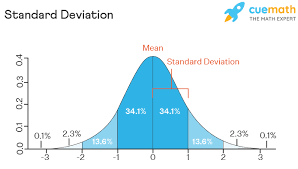

In [139]:
Image(url= "data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAASoAAACpCAMAAACrt4DfAAABU1BMVEX///8vsuaM0++xsbGlpaUvruAxkrmO1/RhkqUvteoge5+mo6KppaJExfG2trahoaEqnswAAACAuc9JfJKjq6/w/P/r9/3w8PDt7e329vY+rNnn5+eqfH+bm5vf39+rq6t3d3fAwMDMzMyQkJCCgoL87OhWVlbW1ta9vb398/D5qwCIiIjvoIxubm5jY2O5b2CseHM5OTldXV2m3PIyMjJGRkb5rhr3z8X52dDulHuh2vL+7dclJSVPT0/0vbDrfVzxqZbshmjW7vnD5/Zy0fT6xWv82aL7ynz+9+j4owAmv/AqKioUFBT1xbftj3XysqJuw+v7zoX95cH6tj35szT6vVH83rZYyvLO8f/7zoPksUFx0vT+3ajnaUTlSwDpdVKIoq9phpXnYTFXhpvHYEOyX0xRkq00fp2GhJPZy8ZfcXgnVWh3sciAkZlsnrLV4OYpa4afijEUAAARp0lEQVR4nO2d/X/S2paHVwgexDkNxQMkezJ5IQkklJd7C8VStNhC1Vpbi3q8deaMo51z73Xm3lbn//9p1k6AQgiEVhI4H/PVhhA22TtP1lr7JckGIFKkWcrlVl2CP4ZyiY2Njd6qS/EHUPfoBElt/Lbqcqy/2huO2qsuyNorMSC18eFWX3vxJqDyrK/aJxsNgAtENdySHfs06/ENgGcv8O9Z0CVbN3UdRr0NCoyqcbFxlOsl0NoaGMRwHd6+ef7u2fGzd2hGb9+/e/7++PmjX18gqhfvXqy06CEq1+065tS1vdDZ+OFko73R+A3fbSRg46KB29+8fPZma+vNs5ePH2+9f/7o5WMHlb3lZm+COCcrnp+xiRdFcfqzdVPi5ORk48KOUomjUVPhaIP63G8XFFXvJNFLnDTePAJ49wyOt96+2QJ4jHyoOT17j1v+MtyZsJ9Ob8sAhHjmpatTm4wyXapplOH6klAb0rM/4GvCdx7qd2oUzW2dDKu/iwu6dFB9QJIXFx/e/Arw3kb17wjtmKJ65sSqRyNUNQN5pAmUJc/MJGNqU1mnSzVFMdcmPxKaQzb7+Ym3q9EMUmhrDehhi7SbO0l0TxLQ7QG1KgfVX16+RXf0QrXN4UIXiFoWRHHgjQLhbafENymD+hqhbmdvw4U+QgUkbQ4+pp8RESgauhu+qQjon4L9Dd7+KHx37WGj8+IG1U07IbuBftnOUefswhF9AduqXlBU8P7ly18R1fOXL21UNw5opVVJQ696srO9U4P46Q5aQnV/+7QIkELXVA3In+7smCDtNNNl4E7TzdoNKlAlkJ5s48fbLAIvCmkg9VdPqlCku5PwLUjopxJo6drOqRkyqsRJIvvhZADqaKJ50GtgmM81GrRP2G33slA6RrcrYZTCDW/f2i+Pj+H42NkykCzVTpvEcSuSFqEqgVoE8sTU0jLIp2U41UCvQqoJclpO50F+MoZK1038rrYD3DbAKw3ZxOsAO5rjgGIatFMZXzQzjTtxeWsoyg1tqvvdu5LtEFVMDSJQXle3JajGAZqaTsO3boCmq82qHbRMqwnjsQojHRt/tb2zvQ3kVNZeUTa8YlSf5EeoDLp/yTCfAHD17y7trfV46z8ultWjQUsB24/wmPgy7FjE0AeoUvTQMOo34yTuoKLmA1B1UMXp+7TAVvFV56GsVlOUDbsvkmYe8L8cRyOza9CqviJUx48eDVlN9JMH1f14rT9aJ8MlbrGXo0RSOm4ZpyJwT8zyDqTZ/KljVdsaf6paRtqAJ5L2ClGpNPV2DTc5qFTL0tMsmpNuqtuU+alAUcWbZgrd1KiZRQNRiacG7l6gqNhicExm6MWWzerIhUpMSaICCtE5AnGRSMCZohSXLcCAK3EymoampERck+KmVc6PvmdViwatv+LFqgBaXdUV0LFWrGogqsUUK4Fcq8V1YG1P5Y1iKkXtCaR6vajSQC0YRZ1WbqpOWw9oYfspFeuJctGw34pGURXBxDiVn253BKxjJPVo6z8Bm+MnEwNVsgl6vkxofRaP45EpcdAQWR6PUdJ4XiWalpLjpsjmNYiHXeqV6M3Woy0khR2bk8lQJWsgEYnQdlJKQCYpXdBkopA4AQzBWlzT8gTTyJZmQmo1ZQ9ZCOoFVveNExcp2mDU8B/LYu2NaEwgssgTE9BL8qypURMDnmUHyX4AvX30/Ji+NqJhYj+VhiveA1KRIkWKFClSpEiRIkWKFClSpEiRIkWKFClSpEiR3CrQmwMKqy7FH0IfKwC7/1XyTxjp8CnA68MSdDoArfMC7LbOI27eOuy0SgevYa9UqBTO4Sl8ahX2Vl2mNdXTUqVTOCx97HTO4fz8ExziplWXaU31FCqHyAfx7J7vAkVFIlTeqsBuByrofgeFQuW8Qip0U6RIP5S8Hx+JNC3B+/GRSC7Vi/XidnHec1yRBpLLPNFXXAaiff76y5evn8N+yOTW0iWKykKt6JEr7ssmk/yJSTKbv687rLyCi7ii1JRV5E4u7yUZRHWPweXm9XDz7vmZO2Vpd+zNboGm6YwnOhiutMYTLln27f6gsMHlMFPCF4bKQcUk7106m7Gf0zkodSaSll6Pvam0sJ9dgNZYj7FlLwu7UAhwVMe0H9uLrwAV+ZIcR8UwA1aURKnzaRcq5x3Y6+Dbs4ODPewm4l/lDLc8xQR7BZqwVKkUDgpwjiTPzivYUWq1zvBrlPVBxyf725VVbzZrsr26AlTkF4fUDSrmnuODlb1z7O5AqYX9w6clOEQQBWSBaCipFv1vo+rsPi0VnhYOMNlH2IWD3dY59pU6uNY6aC23600fjRGcx41XgOp6COgGVXIzA/bAaOmwtAeFytlTOtxwSLHtwd7ZXgst7JDA+dCqCh9buy143eogqoNOxUZ1Ving4rxAIS9NRKVLzn5QInxU3GZyChWuYj2IrtPaQ0s6Pyv9N9oGobx2X6NdfaKoMJJ9cmLVLuIroE2dfyzBx9IhHO62KnDWwcVhCa3q0zLHCcsKT8z6amKV/FOSmUbFJL8AHRLFym33DM7OWuhX+L903sK1TqvQwsPHV1y2qKOBPYJKa8cz3NAqwNkuhnU6oopJllsVKtWq4TyMHTqq35OMFyqGufb/7moVNqrMGJ0JVLYLrrVCRiU+SM5AxSR/D7Ukt1fIqC6TzCxUzCZ9wHGNLw+Gi8raZGajSj4ga309IlRUw2a6Nyo7sh+GWJxbKlRUmUk0blTJn+QIlSPhQXIuKoa5jFA5upwkNY0quSlHqKjMTT9UTPJ+hIrq96QbzDSqzbWrAfNlWa/aozDhodI2GV9UTPKvYRVnQclloajxdDqcEFH94jYqT1R/W7OJITQFJAIqvWoaGqr8lFF5ovrT30Mqz6Kq5ulFG7oWGqovU0bljWpzzcyKzo3ndOTDQsVNUZmBah17zQKd+CwsVOTv00Y1A9W6mRURRSDQ3N/fCQcV62FUM1CtmVlxRbVatxsLIV0H9IhUs1Axa2VWsoqLMBsLipdRzUK1Vmal2XOlVcNrLDzwMqpZqJjNdRo6rqY0rWrfrRAKKm+jmokqeT+EMi0sK5UK7+oy8YxUjH0njFt/oou1MquRwkDl1aayUf3Pn//Nrb/ay79VRpq6N2ZlCgPVDKNikn/+1xn66X9LA7XW5zbtEFDNMipENfOTUbQq/FCoZhnVPFQ/yYMv/1CoZhrVHFQM83nw7R8KlVfvzxfVyKx+JFTW9DjVIlaVHNz0+COhmh78XAzVwKx+IFQeg58LoRpGqx8I1Ryjmo9qYFarRmXWVQDW7j0EjGr6Ms0EjXlWNbg3bcVPNddArkIqDFRT1/4WR3XTtlqlqtjaYZUQUJnzjMrPqoaV4EqVbwJIOyGgct+lcDtUazPAINsPTwaKauxu4jugWp/h0JoMoihIQaKab1S+qJjNvH8eQYvkLRoz68X6doCoxPlG5Y/Kvpl9tcrvp5Sq8wsqQV6xuZ4Pwh8Vcy8TXOkWk32tRgo6rPsZ1QKokg9W/LuDIaHK+ILwRbX6ZyS0fV1yflArQFT88IpWv9ewl/Z6n2nHmJjrecBBCrpgYn2m0R+mwCSrjuzENAfPwweHamRU0O8hplwWVxsQa2/0Nhouq8rarHI5XO1Bv90fpcBK8B9Ble/WCg7VP0eRKtaNMR/6FBXTizFtx74mHDDWPWK6/S5d7fbHUiCqq5VH9qECQ5W5GVPod2OxXj/bd1AxsVi770LV79EUub6DClM0+kNUD6/Wpc0eFCrh6xAVGkv/Q7vbhR7Tt1Ghs/UmUGGKo94wBaJKNoYpKKrE5ZrMyRIUqkxsZFUNsA0qy/SBomps9HvtSavqATWoZJeJ5SiqmxQ2qtiauGBAqOSviXmDeu5YNVubD2OJq/W4iyggVJeJ5aGKJe6vhQsGg4pFW1geqlhs1Q1RW4GgEr8mlovq4TqEq0BQXePRLRXVWoSrIFApsWWjwnC1+tm2AkBlXiWWjiq2Bq2r5aPi7yeWb1XrENqXj+p6YAbLRrUaVpKKqtrev3RUA1IBoIqtYiZFWeVF0RlfXDYq5WFgqBIPV/F72/bvnwsgm7K+XFTsw0RwVrUaVvSoBKhW1eZSUbFXiVhwqFbCiq0XDafyXeoVmzFSgaBCVmH/kLuhEDD3lz5/1TipYFDFEiHXgwHNipZ5mIgFjYq2GUJti9K59kht8cYCx9kvGktAwD/Ts7DXsXFSwaGKXc7q42isXauLiowWLoKwlL5QudksLv6MTVUWVHxJ5UkVVF73nClavHQdUHCoEve9+86cZD+MJqpgiJJQBvWudGZohEqz0REeZFyZvAlMAaAP7yIhg5QtzvDYTf5rIjRUsYT3VRw0/TIW3JIhb3GWzrouX8SdGkzhRckaHO3dUFVlLk6vpWpyijU193XKqkWXsoS0BMvjnEpXblJBoqLBnfc6GFalS8LWsZiCaz7reB44PAquyatQ5r1O94Ko6JTGNZqZJius5tqRXLRPEBp3VQCiK7pr3mP5MjZFKlBU1Ak9rjqrdrkQokINTNON8ZiKvknoERqCjEdwl6phgErCnFU0SiUPslh27ch+dN6EugCqADqelQmUJDPlfMGjwhbWtfvOjzKlJxOdA04BzVL4+HhcryOqOjhTN5uceYeQP0CF5klNhqLCHUn6+J6IxCosrwOvKCbwyDI1/qnmZVLBo0J95SYPhWUVRcSaj6NGxQJRJgxPJTTgO6jKnHYHuxqgwiqOr4JgoypjfotOLS5eT0epsFAlYpe3uPAsG0JZNFlQRUjJ34MKtFSKx6apZtL/Smo6amoe0VzMfMUit2OxXpuWvd1w/hrLR4X7b3jkcfV5qiYjsxgImgCCDCKh9bt5h/u2Fm6tc1OGxktf8cw2sr02dIEeS7abi3V7vd7SUWEesWwXGu48MPura1fU0QO7y2gClTCHteWu9jCaU99r5Hp4lnOIKtuO9WK9bqO7dAd08uginlyjPZYHzSZxdT3hhvNRyd/RK5pAxc0ZZ5xEpX2+Gkbzbg+PIIsrkMvRI+g2lu+AHzCPLs0jO5HHwLL0zBie+aiKnu2xuZI5i9wZlahkLhOjaN7tNdpHlFe2fQRoAQPvWCoqzKNx1OvaeaDxNnrd3g2rmJX9llGGfjgfVe3WqAyVjRe5O6ESuYyWzd2/qfew1IBnPNdr5HI5fBvrBoHKjofuPAbisrlsLp+xxABQmTaS6YlO5qGyw7rJshoWKzeOqt12qiXnZVBJLRlV26kBh3mMshqhQmW/5VnOXDoqu380PX3OPFSyZcUz32xOk6hmKPh2lQsVpZX7llH1eQ3x2zugVNP14vTQ3gxURDQtJYPmNCzSuqKitLI5LcNymujN5PaoQDQH43PKeO8g7+oqAC9rec6yvqE1TQhR+eqXqflepuQxJ4xbmw99M8KwPqVv3/KWZWmmKU62Dow7NRaEJsispRoW55K9QZGM6v5+zZAynvrHfV/984Gv/m+BJJf+OZUny6YPVTYMtb6/3SzW1LLlOkxrYU5EFICnvZl4POWStGO/xB25P3U+U+s//4uPfi6Wf/ZTVfVNYvjm9LO0PVnKuJeMfVeiRUndTCDnoaL/97UFfgfO8O/Lxt0Of6echLp/YcAsL5DIQ2MTyE2LLIAqvyRU/h1Qzf8QxUVQuYcrF9XYBHLTIvv+O8gvcI5U/xvtUstBtcC5BU1dIJGX6ARy6qwxqQVG6MkCg4gL7Ebwr4/IAqMli1xSWKTE3hpNIDctDNp+xeNVxd8D877XzC1J93VS/xhDVGUBGy8rd/TAORJVEGZEsZF0GXwPUtb9UNHx2xlBYCTBuQgzT3ET4r6+znJg+dchtxQhoPnd84XHt+/b7PXdC8fa0OfL/zIUFqbu61388FHRpSmv4Pmx1Hk7Jawiglyfny/djy8qPNP+xin4+41YX+BObcLeoU/jI1MbXM2al8bPQ6l8UYlIQfUrvz8qubZAYeI8RoQF0t1KRGV1v7O0r3Csr837t73YlOQ7EO4bN6EqcaxvHShXLXX1d75HihQpUqRIkSJFijSl/wdL8WYQkIem1wAAAABJRU5ErkJggg==",width=600, height=400)

In [142]:
import math
print("standard deviation")
math.sqrt(statistics.pvariance(df['math score']))

standard deviation


15.155496659628149

# Histogram:

A histogram is an approximate representation of the distribution of numerical data.

In [60]:
df_num.head(3)

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93


# math score histogram

<AxesSubplot:xlabel='math score', ylabel='Count'>

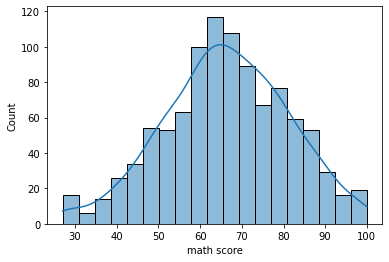

In [148]:
sns.histplot(df_num['math score'],kde=True)

# writing score histogram

<AxesSubplot:xlabel='writing score', ylabel='Count'>

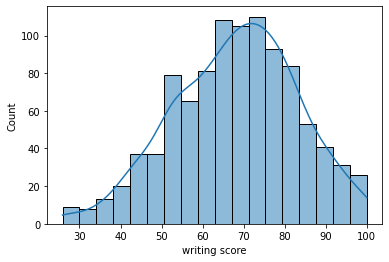

In [151]:
sns.histplot(df_num['writing score'],kde=True)

# reading score histogram

<AxesSubplot:xlabel='reading score', ylabel='Count'>

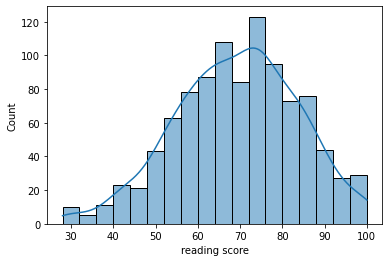

In [152]:
sns.histplot(df_num['reading score'],kde=True)

# Normal Distribution:

normal distribution, also called Gaussian distribution, the most common distribution function for independent, randomly generated variables. Its familiar bell-shaped curve is ubiquitous in statistical reports, from survey analysis and quality control to resource allocation.

The graph of the normal distribution is characterized by two parameters: the mean, or average, which is the maximum of the graph and about which the graph is always symmetric; and the standard deviation, which determines the amount of dispersion away from the mean. A small standard deviation (compared with the mean) produces a steep graph, whereas a large standard deviation (again compared with the mean) produces a flat graph

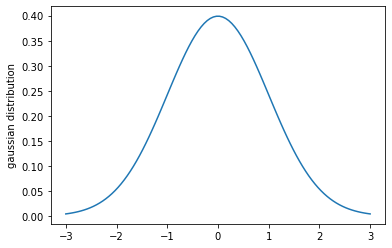

In [170]:
mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.ylabel('gaussian distribution')
plt.show()

<AxesSubplot:ylabel='Density'>

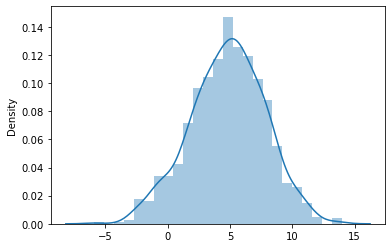

In [169]:
value = np.random.normal(loc=5,scale=3,size=1000)
sns.distplot(value)

# Log-normal Distribution:

The log-normal distribution is a right skewed continuous probability distribution, meaning it has a long tail towards the right. It is used for modelling various natural phenomena such as income distributions, the length of chess games or the time to repair a maintainable system and more


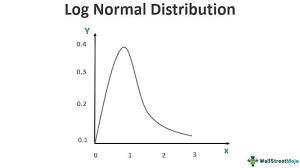

In [113]:
Image(url="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAASwAAACoCAMAAABt9SM9AAABdFBMVEX////+/v76+voAAAD7+/v7/fz39/f//v/z8/P4+vmAgIB3d3eOjo6Tk5NxcXG2trampqbt7e15eXnj4+PFxcXg4OCenp69vb3o6OjV1dXNzc2wsLCPj48nKigiIyb3//9nZ2eZmZk7PD6mqqkiKigiJCNOT1EwMTNaXFsYGxoUFBRMTEwzNDYqKy49Pz5ZWVkaHRsfICP///fp//9ERkcFEw8XIB0nLiwyMzYAAwwUGBbl8O1DaVzA085lhXuframYu6/H4983dmhOhHaQv7NDhHW+zMxJeXBlno+txMFZkIJDgnYfd2HW6uRddnc+Zm+Hm5kuVlUATFYAPD/t8eSkq5txj44EW13X3dG9xrJtj3Su3MJxmI9gq5qAqpCeuqVMZGO+5uglj4eMoo8YVj96q3dzolVmm0Fvm3dMfn6Mrq+R299BoKBStK9Xmp9xsbGYyMyStkVgzMaU6uq6yJ6OplYoTUik3NhCnIY4f1wgZEYZX085roxdAAAQXUlEQVR4nO2di2Pbxn3HfwcdQAAEQYAAiAcFAqQCkpL40IObM7tuLKdzp7SWlS5zuq3d7DRxYzepvWVt9vjn9zuApCmKLzm2QAn42iKpI3A6fHj3u9/v7nAEyJVrI0VGP3PfI5NjFh0yK0HkJtnCzKtLfxc4UVgz340Q4ThK6YI3BSIQjhJCBXHRITO5gbJVxmfKcRyJUXMcNEJzRIylcOOcGqEH2pY8kwNDLYBQUY11P55rFMECq4vf7OztsSvd3xXXzK10YMfPta2Dvb1u0SUC9LcaMCJkFmvjl9DEZC1SZrOoFU2gztaWSzaPFoWqH8MaFa1ACtNvtprdvkCghbCmyj7VdOnUuazmbMewCqD5+7I69A9qULA8ncSHFaC8J49OAWp5IsLaHp03eqCg7FaxuruuMGUDZl6kJh4vS8WCEklUWsMQP3hqhd1Qq9rxm61mq64BtA5FAq66P1Rd4K1tq9Q1xYbnDYYNsFvDKi/x5XC4r1oASlTG3Aqw8xF+BGKl29TBrlq8UGoNi6KtdjtVk2iaNWixZNDqitZqVXkwGjUAvbHD1zpdterSnarI4x8cDmWXB6/h1Ib7Wvq0yAgWiJ3d5rC3p4He7FZDP6qMYJV7TRFhCbzr+8Nhr+6CfTeMtmxjr1Uftntyfdit22Bt+fvN3lC6AItwQrNXA/VvyqDUm60tL6w3u2ilBu3W3iEm26C18aQ2nuLttQCsu/vQbPfbW5rU/1sHzF5vOKx3HdB2B4fD9oGZNqu3sGpRqEOt16Q2tgOH/RLDaoudepXVLAj9bZ6T6xUwfb/kGlavbUO1jQ9KTwZ9RwenWTdgewoWdhxhrwrFj2wY1C0wXb3aUw0dBs2maYKKyVqv6YHit8CrdxAWvnDkOyVLFIZ3HDLAc3UVrRoe5UKlN9sXpAirEmFDgI8PnfJeDcT2AHhCEFbPMXtdEWuW1I0MALs3ADMKeQCjh3XBxMtDwiGe6bje8NC5AKtAQG03YlhhL2QVo3zIrnjQY38qhlXH392oKbj1QQILSh/tYH+IsPTexw5mjhS1XoO9KKbJKdYEVhh5WJM+7lnGxy1XudtgdozBMvBCS51DUYoinoKLiMyIXbFRZ7CiAbuMEMTwYOvvujOwKMEapcWw3Fa9vm+NYdVZVxfD2i0x7F3dPZyGVWCwjN5QoNgWB7BzuFmw8IP28Sqh7RtWs7l3qOoSYY4S1izi+sNWJAh+hGleNIEVxbA6PJSjELs11SGtKIHFct3xQ+za3Hbdg6JvU+DMjl/EK5aBEXTxPdW3Y9dBsvy+6PY6Y1gHO3xcswy/KUpg+x3YOagyWAs9nGtTDEsSRKkUqRKU/T5sH5YtR8JqMYJF+Uq7H4lk39eAr/jyJVg2clGiHTD6E1jAYEmO3e+GlMECkwMv6kDtoAgSDCIXj1AjhOUP0cwhD+ugr5NiG7NU/BJI0rCtS338+AQ1asBOxGBF6cPi0c/yd+9u1Zx2e7/TRb/Ia/cOe31ZYO0Q9iOEZd1p3xWwAt0JB76PhnqP9ZTW7j6asN0B1qxdpBD1wzvduw4oewksLfJ3d+9GHZ0HddeGqK8OoxIC63eqMNiLYe2ymtXthj5CkfrtQavfxSxrfr9jU8a9FHXDQTTE3vAug7UbpskpFgFPRlVMcDt+NKwxe92S1f7uDsKi0JB1tFxlWcEYTtvf9UP0s9wKs8+6jObGqjTQHapoIMm+Xy1XsD+teHGubgVzbXhxi6y4UOofdBWJF+Vobwczxa4CNEw2K17loNvAT8Ue7oWOsg28qEYHNlVkpFwdHvjMdzMr6PR5lZ2UUeG1SMkzL41+6LDnMN+SWXjKMceaj48bH0Qon0Rw+Mje49HBByk+Bn/hWbSJP/zbv8Ay5ZMnPJXgCZhIMQyaxOl4OJ/kjeksE1YoEp80yhczJQDrxacfUJTnWElZuMzH/0h4GGpKM7IYLIpRNl4eeuiEXTI+85JEuTh6kajEc0QifJyGP5iA/ylDMMqVAWDXj4ARFELgmUhsDilhmWOONE5nOfN4enIIYxfnyoghsri32YBgkVx4wB9daXWHFXcqZSrO4IHMxIjscRTb4ROZpF18Im8PhslRZCqb2UCQJ2Sq5l0owwZpXMLU6/xNEDY7jjWSjfwkc+XKlWtW2JOPlXZRNl85rCsohlVInKZcy8Wca54XKB9IXNpl2XgxWMFxwAf3An710RkXGyC997P7wc8/yWGtFDNWwYOfnzy8FxRWH51xISyO3Pv00wfxWEuupcJWiOHhLx4eFwrJUEraBdpksXEtAvf/PigUCmxJSE5riRJYj35ZYLDAK+Xe1krxQQyLDPbWXGyUi3hbW9W0C3FTRLlGuN7CrFxAQVNzm7WmCGjpLzC4KcphLRZJprPQVJHxvBXCypvhPDF3XaRsYk8cWfUc1mIRqmyX8FkPR/5CDmuJLBlUdEJL2gRWVc5hzRUBV0FY+FhuTGxWDmuBiK4aRdE27IY8vqdkCawLixqyJwpezRJq2BxHq6iXwSLAuR5H2CqbTCq+3YYCu/41mqFRlGVVz+oCkmSukMb/RikLYREwQg/ADPNBibGwN7x0I1IiKqgeuymg1siu1ZrRYljQ0OKaKKjutZZog7UAFmE3PVGIF3GZCuTT/LFiWJdRIKR4TTKToDr5KH2sBbA4MOVJf1nW8qoVa2EzrIzvMyWcHnJ5zWJaZOBdrFgJIWQm5yY+1iJYijdZio0mvnGdRdpc0TmwkJKhCmM7xW6BVW/UdgMfTHNhoVtfu5CSt8NY82sWCZ0L3Z+dTy0yEWhcmr6n1J1xJ/RifosBxHtaXIKFaeaFNHQkrDxAXABLDIULY1gEajXIl3IlsGZlziQR4uZjz7AAluLNHERENR/Vmg/rkluFxl3JnQcGa7s0Y8zZ8rZLyp0HmAMLY+bZVshkpL+LwLWLXLgZN36pzNYstE+XT+RU/QMXbfNEwS2jy0TNspMkcJdggTdvgAtKc6rb7RahYtFVOSJ45VGQQy/DapjzJr/MzBktwgKZokhoTbWTlEuwAEJ9Xs1y1KwNl5JkYQibE1TH0/fyzFSXVZl/api52VYqyNWSXnFKjckqmllYZW3eiZfixdsvNg2oE6oTcdzULsOSrflnmtXMz/FcgiWEcyNmbLiVrC4QmegSLHf+BDXbZ825niJtrijI1bew2ICyPfc4fKeROU9rVhQqUw4UIbQy12QxZc/TmtUsLKO40Iw7xazbrBjW1Ha95uIFRrSYdaN1ERbEsc4iWo30N6hNVzM1iyvqi++bzvzENIHidM0y5sc6ibIXHs4IYU3vlb1sQJSjRSNjEc+MZmAtG7UiULWzDkudgkXCJeOhNPP3nl+EZchLYmUCYijksCYEls7hoHEvLnTvM6EY1uglQZO1vLvTytdQpM3VFCy0SqumcBYMSWRF0zWLOuqKje24UMiyiScQjm3W0sBwpGzP4l+A1Vg1zE7YME12q9YUrHjWeQUJp8hlOOKZhiWGK48mFSOHFWve6pnZo2u1vBnGWjD8PiVKFkzBZkMIa2cMa/6M4cWjMz1cOgVLUFeusSWZcuJHX5r3Nlwm0EmsEGWLbFeeHu+ikRUR4mg1SsDT7LFzlcAiZMEih1nRZaM4t0uUKG7DA+Iao2uewGLe+Vr9XGbaIaGcKpTZeKdbSaI8AoNy0gzRJV3HhSJGMSu7YhBa0WsmpUbFgfhLbSewBGethR/xoFY2/FJCwS7KomzJlUZyW+8YVhJFrwEBc1jpu95WTWoWVNddrCbMW82cCb2tWaqzbiCjpf/9Z+loUrNEdEnXhOVk9S5ghJVMBl5lxLhRXrwg4jZrAqtWW3ns+BSih2Im15cSaCWw1h8wRk5aNaOrHvZjWORKXZwQWtmklcDSr7bDslsUSBbNFoOFkfWV1l4R0JQMsiIjWKtHSS+IcqXqlarirVACiyPy1fYiEIArXg3vbVACi85uTrDyLAJ60Yy/tvvDlW3jRGGIMSGbh7ii40SIo5qQOVg2G0m48uZrWBH1sJyt+WnCahZlyyOvWkcoELGoQZY2qSHQx8b0bhNchAglRUwGETOhBJajvssFs405d4pWdm5wTWC92yK1eBjMC8s0O848woLy2kMOM0KDpSuykZktkBisd16jhnVKBDPUsjEaSKDp/eTtQERNtbkM9IsxrJ96+zMFY1u1xVtv6WNYXumnDXyyWVdLUWu3fdaHQNdlM/LvoQU5Wqh4GDVyt9bxQlge24b0p8Ni3/fgKapm3FZUI1ih+B5sM4m9LadWKWoWBzBaSXGrRKHtOZX3+SW2xCrLasNj/Su2yFvFC2G573MPAraBC4BubodFzWUG/7bBYqsc3ts1sW9eiR0Rx1bUYtW7TUvfGCwMVz6MBMNuFNXSrXHvmc16pyGHNRQPo3K6d4NhcabHEcK5yTpuAu3yh1pSS5IvnrzJZqtaY5tZeKXyqHPvltZaeJtNqaJZA47aY1jNMPO7Fy1WRUdYFBBWsqa02XFG3yGWlmj8kDaXuSqXZKvquiXFYuWjMFSpwKUrKhBhI2ERaujEER3DEBNYrW3KCemK1jrrrcG/dhECoy83TG5NCQ+3NkE3oZehXPofKYFyaPFpl2INsdgksbDpCRsikW4CLNYk065btFDgaSHlQtwU8bwU8BvZG26gLCtw9RvRDDdA9x+e/PJeDms9Bf/w8LSQw1pPwWe/enAj5hwpBWF5XIaeGLdiDSUlHLfsas3tGrckh9NP7//68U1YLUGJpshLC0qIJTdWeBflkqovOcTR1WXzR48fF05uhM3i9AooS/dzIJSzVuz1x9Gle7YRS1HEJTWrUOAKhXnDqQX25cywOR4YdWTYXrqGhnDEWnHvKge2siRsIiLI7zBmxhO0+kEQ8Imfz/PxAz/l+hfI6Fc+FvnQ7jURi1Zl6QwM5QRPWWFRTNlZNsaiKQ3h6hfC80f3zp48OT864gubAYuCqy3/1NFmabUVuyrbNW3JGEs8Inv1dTr06OiLz3/zj+dfHB3FsNiaJqy/BYyOCgWaBLQ8x3NYATFeQmCYfNW/cWskHf0T//TLL09++89HAicEARq2gq5bEjORaEjZr8gtkI4Lx0EB/4mYkHaYm5q++Jd/ffC733/24P6//fuRcXb66sySgk/On508e3Z6+ghtmRQE94L7r55/de/174Pj45PT4+PjzML6w9e//ubFH//44tuHXz8+fvby5ZP7Z4jsycnnpydnT8+fnT47O3ny8tVfn3/1p+++f/7n1z++ef3nN2mXOTU9Pv/Zi/9AfXv2iQBnXz45e/T08zevzu6fPj1/dfr05Pzl2dOXL0+fPv/++//8/vUP373501c/fJd2mVPTUcD/119evPjLF4EkwCfnr3YeYQN8dWacfX56enbuPn52bjx7eu+vj16//vH1889e//DmFy9/TLvMqYnn4bfffvPNH44Iu1FoysPnpx4L6IlhdMkHwX/fx6c0yrkRIjwJHvzP/z5GN+toyrlChqzbi/0sPoh7QB5fBGKQZdcBvUx68vX/HV+CxU/DCpAUSwgKAr6TdplTE9IIHv/uPCCXPPPpGsSPEhDtdRZu0xRXo1FsuPZJ/w/Pj0WBJriYuwAAAABJRU5ErkJggg==",width=500, height=400)

In [117]:
# practical :

<AxesSubplot:ylabel='Count'>

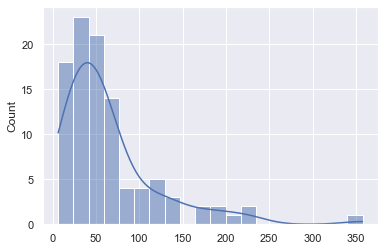

In [116]:
mean = 4
std = 1
lnd = np.random.lognormal(mean,std,100)
sns.histplot(lnd,kde=True)

The data points for our log-normal distribution are given by the X variable. When we log-transform that X variable (Y=ln(X)) we get a Y variable which is normally distributed.

We can reverse this thinking and look at Y instead. If Y has a normal distribution and we take the exponential of Y (X=exp(Y)), then we get back to our X variable, which has a log-normal distribution.

In [114]:
Image(url="https://miro.medium.com/max/828/1*X6fvC851lFtEyDGCgcZc7Q.png")

# Outlier:

What is an outlier ???

An outlier is a data point in a data set that is distant from all other observations. A data point that lies outside the overall distribution of the dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

What are the criteria to identify an outlier?

1.Data point that falls outside of 1.5 times of an interquartile range above the 3rd quartile and below the 1st quartile
2.Data point that falls outside of 3 standard deviations. we can use a z score and if the z score falls outside of 2 standard deviation


What are the impacts of having outliers in a dataset?

1.It causes various problems during our statistical analysis
2.It may cause a significant impact on the mean and the standard deviation

# Various ways of finding the outlier.

1.Using scatter plots
2.Box plot
3.using z score
4.using the IQR interquantile range

# Detecting outlier using Z score


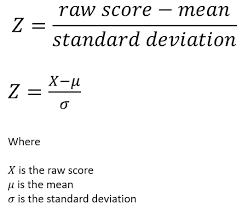

In [111]:
Image(url= "data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAPIAAADQCAMAAAAK0syrAAAAkFBMVEX///8AAAD5+fnU1NT8/PxwcHBqamrw8PDz8/Pr6+v4+Pjo6Ojh4eHl5eVFRUXExMR5eXmFhYXR0dG9vb0/Pz+np6e2trba2toyMjLLy8uRkZF/f39OTk5ZWVmbm5tnZ2etra2fn58rKysYGBhBQUEhISGUlJQ0NDRKSkpXV1cQEBAeHh5gYGCKiooNDQ0XFxc1LaR0AAAQ/0lEQVR4nO1dCXuiPBCeEZBb7ktQAUU80P7/f/dlEmxtt9t2d9uvrc379KEYQjIzmUyOSQKAhISExE+Har0SYfLM3eUd9f5yFfiWTJ9L/g/e/0MYAyJMNMSC/ch22OIJTeuIU/bTxQbAQ9xeIte4PmOX0Ws+dog2uwtjPGPNH2IKKeKKHmt4xPKlfANEBU6IGti9yJwltcHxVh8wx+DsAUUJYU7x3gtqXCcYVUmJTL4h+nQ5WmDiwJk4set2JIi4jwASdAHMw0KFJQL9TCiKB/W+QH+rRfQ7w6nKmFJ+n+80KHCrLbMNFnkR8dxYeimouAOS9X7CaGAi1coC537g7CnXd4LLGOk9sJhAjbsZC9CpgCc4Y9qmkQhgOrvE9alYVZL3jLjNAmKOfpqsRE3V6lr2w9NBPcw4B9nvs3XAxjyhwu5MsDjLEekUrCt2iTtSa5xRPB37JRX2+7FMuZ7ETcPKiphgOat5a7DMYqakFhXtJYIvbiKsx6Ap58vkDxzMRVVcMl1kLMVjHH1f3WMXXBKLeA3QKHWT14E2V0mxeF1iwmAZc2X2cM/z0d+R5R2ONiM+ULIJZ2J/1qGca0zLtvFD1D32ClwToGJMtifkNNecUiIe02bAxYVI4xQ8ILmkdSK9n3SUekp8h7iI5j1PYoUO5zWleHOSn3q3eEeOTbwoLhcnVGci1UddR/C7ifGoRjITxaiz2nz8LfSaFT9RWo7K5+Jm2aTmK/nujsalfPmLCZbLJuTG+9zSVRMVo1oblOT2haT+FOElNZtrGhM2/QjQGBp2nQyP7a59QCJ0P/6MRKWouO2OW2tM8fR6thbPreZ16W6jUmk6l2fYc3Ja0j6V1/PkJVP4x1heDLJOiVstk7tBocmRl975ISZnfmAs69w8gUfczeFS1gZv2O5/wvzF2ufxNwPi02CWwGBWn1sFkj+SEu27BRgWFFx+GppE1Tthipe07g5KFitYZqzMUmoOx+sIG2tGXkdKsELPVKqBlQ21KXrbEncRZ4LQYsYexy/SKCSdd1xr/exoK+ibdsqt9gw9Zyhw7/bhaFPjQ1a+m2obXX7p/ESIbQg9ttnYRINyraJOj9WiHYg76j3gkhuuNh/uNF6e83vxOC17vL3qUz2DgdcFUYtabBUSAmLPNS5DXEcsxtEj6ZKBaPBenu/B80PPzjAZmRO6gOryivSoMVQN071YatO0Lnf2WJrWQ6lOdPO1/qKILTJXeZZg2Lp6IWRCodZDqvorbZTrjHgl29uByzTkeGTK1X82Jf8bCmQ9NHDP+H427qsjoG6q1XNT90MQktHx39IfuCmkuHu5kbg5uGL4fsEOr3CjomgfRnyENLnCGKZOvime5zh4eRKG44TfFM9yE4lR7MuwQ+V74llmzk9nTU5T7R7+q8L4hqj4dEKxegjRNrN7VDdovk5ihmr2enW+FXiYG8waB2Lm6EcA193d+cAs22uTT3+M1NeSl2NEvtY8CnBLX3thGDn5bSVTf9MWPRvX1Ee8/Z23Jl2+pjnqCevHASHmz8bkaNriN0/UVf7RJseK3qITwUuT8RzzpzFcDJ6PSWh/1cRUtDX2/bTrhyHCt0wnbNavxdg/7Sh4j7uBj2H+wnExzj2q9ocPfKv2LbGE6+glnKsnAadXFeMRBvyDOvw38GZnxMGEpsJz23FVShDPJ42NO8OOVdysxZGHLeKdhjW/nyMelouEOyU9KDrRKDYsVMMr+5axwcyqFcVuamskP6IaIBpkFNh13o2mIZyxiMs7ptUrxLyLJxCvR5WvY8QpK/AsZylnG6z+0QXrEQtL1lMrEvTDgnpyU1RAzZkyRnmxjsNZMbK5Z4Wln4XW7e4cMGi2N5mFOK0XDY8ysDeN7mpaIqU5zpJP0DN9ZZ2EHmGyS6YsyrDkU/YLoQHcDaXRJLhS45TToWLMS3vFcjRZWYRtMYuLvvD5fM8/wCctsnyLylbMxy45yQvUwTGhjfcqI5b4EXar5+NOn9+37D6zAHNG6da5zOhWeF8KDp/I565XZsNWXGwwUbgzJoOQxrYV14CMD4FSnk801nxdKI4gJ0DHtKHqdxNQ/nVqd3lvTVdCj3TheNlxUkwkXxsvDuG6mRx7zgp3Rdz1gq9O8GjyCWk17+4Tn/IkhQuCewdCUeCCz6SH0YfNBGxwWhQYvblcAKTyhjDbJyLBOFJK6UvG8C2wZrgTWXA/NvFXc/I5UxfPiErVNOX8zUF4zy/3jISx7ib8TfuhRdKFEVghD26LeoUrrqv5ga5dNHp12cP9gyT60eAL/5Tw6DM5KJQhlXvw7/2ruVincCG15EIW3l3GGzk5WyrNKdfXmjM+cO1OhLj9S9vmc1qEdnIIZ5V+IF9qgTv/VAvhjssTSB4Nz9vjjBuH3QP7bHxAfhvGIElXnZEaiMjxGwbFryHDFi56ROxQl20nrApvYjPuluRFoPZcIBu6t1rhYO4uDfWChKJuHlp34VxKOOP1VaeNJ+jwwa0QpNCPJbdL4UVphN9G+GZsLiTyw12q+N9jSZJcnU0qUKY6BeXBGFkemFWzQF/3ICqPIVg+Hc60YIcvmQgOB7p38eLoHoj8LTlirSuWnZa/LgpfrdWRK/eORDDpY+pJ1/SQNYYei8h1J2R2kUnKINUhlgMKVNe9JRYv/EsrNeFq05JCbTGxtjMyFInRlNpBD7YsW1L2ExZexfJOjfl80VlsWDHFSD8td+1kWo9KCZyu2lgGq7VRjq2Ig3tdqVj5hjFJRjeU2UKwPB8XG7DabuwjZoQHI1wk6LF8EtxaTWwx1pZOqzNReeQJFItR6MpiKfEvjLwdNuuF+G3scvoQNWZczCMy1WG9joCS5/MMiCwGPQ9o2dKcewXZPx9JE4N7X6PNhm4lmYb7yXPW2+htlkfu8rUHOEqHJZWPLw0iTEOcmSw4tokkJM8ma/W7gj+aroSdFGJSODX/gIleeGPdMwphXFQ+66/QZfT4OZkIJ+sU8kiT4v7+yteo8oDwiiD+pp2N6WcXhVSch1fEYC+jEDcTaYsE9FD0O20vFO9NDFWkeYNTOhISEhISEhISEhISEhISEhISEhISEhISEhK3A4tWPKofsezxyyKjcyTMIzavR70ZJEgnG9SfTcb/iQkr4M0vW4LLKYCbh8+9cAPwe+2XRbTqmq8fuNUKnomlZ2BmAgotlaSlKNrmkyn7MJTjutv5Zf9RROt4DJi0t7op4zTzxCotdaJy0OoMraOSrj+VsA9DgqAen9ZllU6LWbz/powPRnc8tl3bdrMX14RFxJf/dE+3iZrlr9AJPngd+Psiw0XmOM755SWtUd4WkO3a1ePgAuNjba4P32u7Uc3XuvovbeJgmFjWBFRr8kQTggUdMWZ8s/38NZVuin+37K96v3PE/me4f7ktTM1f3S7yRaHGjyryyb/CpxH1sSgfV+Tp1a7WG+1XRbh5dW1nc7Wf+TmsXkvgS8HEN2xsW66mL+J71ekd1o8DCu8Kn0HRR2POtx+YV5vSDq8eXfC94eGR/pVPtx7eLsy7620/PwHqDg/aarXAn3MikqooSsigKB93Bq+ExLeBF1R9e/ij7eTfG1mPwU5L68+m4/+Dee51SLuftOdqTpspi283x/cvWIhjen8SyxXtzKzybzWp+Y/w93yX7GeT8X/CWFSL/ndn9dwq9J9UjyUkJCQkJCQkJCQkJCQkJCQkJCQkJCQkJCT+EbT2ie/+sWDxnt91/cLYpQCnno7Hh+kPWe2SaADxnQ1exVjOiGldYVfXUnQwlZv8uKfTqUZfplDWoO38toFsFlRz0KppGO6CXf3Z9H0EWjc6eVNAHaYpZGsYtoWH4G8B8qa4/pby7SBIAk/PM1adVxmYa9iclssENA8A2V392eR9BMLhDqAK5heW93wNiBYBdLdqwVXaFLakTxIMCpgIxbH0NVgxlqNjqd3mJ00zF8CgjfWOBSorWDNULHBoS58dKj9poZOEhISEhISEhISEhISEhISExE+Bd7tboSIswecfnJw/OqdsccMb/DYFn6i//spkpAEMN7zDL/VHn0StQDqlD6g6u1yzVnXpm8S9zx2SSTR1PF9ToLTBSwBK/tXnKVOMRjsZkGilC1kdJPTC13fe4XhorJ9mrZ3YAGozODDts/kA3t4scvJBT2eK5TvRGvwEpjk4/IvEK7eB+cqpzfng1GvLQ8/2Bjf88o6saD3W4TLVseZz9VyxPTBj0PKq4nuzV1TWitdZ3g6mG70hbVDoYLSOZHTUAWaZVzK55dX+DQdLfSoUTenFXZmCMT8TuSPL9gYWtWpxKQwZWK02v7MAwzKpd5wr18/haNA305ki7DLvBKDVqvHFDylwN0yzRamUqeMKqxUtBMsxJBX/ojNnuWjBORug9YVT8aOUPANac9iCa+yXkJ0Nj04UZi98bVtvxz64rc/L5eTZ/ZHfTnad4RdgLlQIji0/5E5jYpneTSsDvKMJMT8XvDgel2BUXWzr+y5WwCOjcDre7Am7EhISEl8T3+xg4L9D+mi02N3qgf3XKO/XM0asLxHfcDG7GRh8nJgZkKU0fjQ134NYj2gM7UZiDBkakQKFx/opNg8Jo4x6WdG3/F5FuYR6QTeVksUNnZLtDKsEqr5pawjjZMrPTs777XlfDhpkfaJpsNWaQwHdZtl9x7Ms44zGEwwLJZqJAUFSs2AHigp2p1p8hqPPYOuDcYRFWYtjr5Zz6DIIv9dZuhx6ZxE/DIsQ6jUvUs6yAUoF8TJNSZshdmG+BP1OjedpGkFY5ecldCZk35BlZQeFODd3QR8boVV+0DBtjXVieVGPzRWxvGUsT6YNhXQebLc0VP6OLDdtmmJKulsp9WyxoyItUINWh3ADWbtY8HFR68BpDiYaLgvxYZsP8RyQsbz/XPL/BqvQBpO3yLoKpi0qMwtgQRMmCMs2eRC70mcLKJSH2ObEoED1+zXfxvF2p6t/g0ktz9KVkLgxWI+Mb/HLR+CexerJlPXOFv/V2aOZXffq3v46y9q3970KK6WjkX+NEf06uoqfbCe7zNpb+IhlHCWRKQCHL+DsYq3rhT5x4x4YyydQH0LE/zzjsceX+GWT3UdR6W9kWeUsq6qId/8cmosgRfAnzfG7wxF517pmnar2yEaDRo55WFT7gwZwyluNCKuPx6jENrBnPbLO5mKGc5jsu92dYyxyTCAaWt+atXvu7ND7ds9YLvM2AHQhuwO0srjHrDgfW9gpkNzlvQNtkONnlDh9q3LH2+a6BDSofwV6y+pyr8Kd6+10vacxca6ADRsXdJ22CjZ70M9WsmI9UMdywWzBY/304AQOnalM+8oyhHShm+iWDY1HDoZpQLqCmlmIfebghAascQPpZ3TR56wLHRcjy3Ue8J0zHVds2DtNr01XtF3K632TV9x6qBawbECNDY2NPphiR6t9DJ4mnPBcsfsCJghbetfNeuhtxrKaDDMNkjmxXLDITEy9C+7iE1ieehfjUtP4ISAVt1thviqnfvC1NAONoeeaWexhuYRJbJRLxp3jxbYjWB6ikeWdx8wXLMUeq75mI4+DWvp6Or2wvGMjuJhYdj6DZTbSnwraal9fpAOjidFbu+Q4nWU6LtOpS5+3SH0fqrJYVtFsTwPHSatnmProeF20yllR01ayVPhZ02M0INjYpBXtOmP2HyfBEPVTiPqajdjU9SntUugccD7lmyjRcpy/ykJQGvElrbDRbabskQ5WkvDHWcIIN5oQ0sSNQFFATS3ImqxgdbtRPHCpbhSNK9qxorFTFfQkYTVBT5ilqFV6kSlUmlCqak1PUgOMFz/BJyEhISHB8B8bOxcoGh98ZAAAAABJRU5ErkJggg==",width=500, height=400)

In [11]:
dataset = [11,10,12,14,12,15,14,13,15,102,12,14,17,19,107, 10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]

In [17]:
outliers=[]
def detect_outliers(data):
    
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    
    
    for i in data:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [18]:
outlier_pt=detect_outliers(dataset)

In [19]:
outlier_pt

[102, 107, 108]

# InterQuantile Range:

75%- 25% values in a dataset

# Steps

1.Arrange the data in increasing order
2.Calculate first(q1) and third quartile(q3)
3.Find interquartile range (q3-q1)
4.Find lower bound q1*1.5
5.Find upper bound q3*1.5
Anything that lies outside of lower and upper bound is an outlier

In [127]:
## Perform all the steps of IQR
sorted(dataset)

[10,
 10,
 10,
 10,
 10,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 17,
 19,
 102,
 107,
 108]

In [21]:
quantile1, quantile3= np.percentile(dataset,[25,75])

In [128]:
print("25% is :",quantile1,"75% is :",quantile3)

25% is : 12.0 75% is : 15.0


In [23]:
## Find the IQR

iqr_value=quantile3-quantile1
print(iqr_value)

3.0


In [25]:
## Find the lower bound value and the higher bound value

lower_bound_val = quantile1 -(1.5 * iqr_value) 
upper_bound_val = quantile3 +(1.5 * iqr_value) 

In [26]:
print(lower_bound_val,upper_bound_val)

7.5 19.5


In [133]:
for i in dataset:
    if lower_bound_val > i :
        print(i)
    elif i > upper_bound_val:
        print(i)
print("outlyers in dataset")        

102
107
108
outlyers in dataset


# Outliers using plots:

# Boxplot:

<AxesSubplot:>

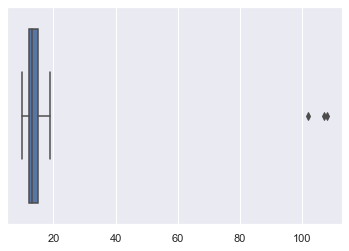

In [34]:
sns.set_theme(style="darkgrid")
sns.boxplot(dataset)

# Violinplot:

<AxesSubplot:>

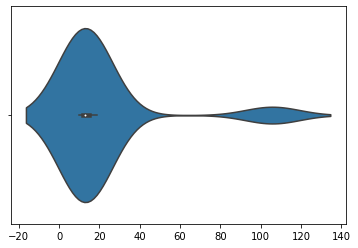

In [32]:
sns.violinplot(dataset)

# Scatterplot:

<AxesSubplot:>

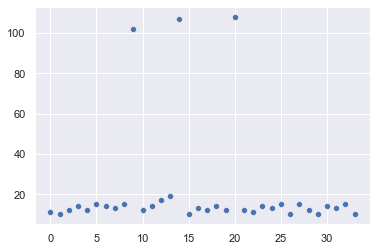

In [110]:
sns.scatterplot(data=dataset)

In [73]:
import scipy.stats as stats

# Chi-Square Test:

The test is applied when you have two categorical variables from a single population. It is used to determine whether there is a significant association between the two variables.

In [68]:
data = sns.load_dataset('tips')
data.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [69]:
dataset_table=pd.crosstab(data['sex'],data['smoker'])
print(dataset_table)

smoker  Yes  No
sex            
Male     60  97
Female   33  54


In [71]:
#Observed Values
Observed_Values = dataset_table.values 
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[60 97]
 [33 54]]


In [75]:
val=stats.chi2_contingency(dataset_table)
val

(0.0,
 1.0,
 1,
 array([[59.84016393, 97.15983607],
        [33.15983607, 53.84016393]]))

In [76]:
Expected_Values=val[3]

In [77]:
no_of_rows=len(dataset_table.iloc[0:2,0])
no_of_columns=len(dataset_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05

Degree of Freedom:- 1


In [78]:
Image(url= "https://i.ytimg.com/vi/P_KWVtxkouk/maxresdefault.jpg")

In [80]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)

chi-square statistic:- 0.001934818536627623


In [81]:
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)

critical_value: 3.841458820694124


# P-value:

In [82]:
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('p-value:',p_value)

p-value: 0.964915107315732
Significance level:  0.05
Degree of Freedom:  1
p-value: 0.964915107315732


In [83]:
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables


# T Test:

A t-test is a type of inferential statistic which is used to determine if there is a significant difference between the means of two groups which may be related in certain features

T-test has 2 types : 1. one sampled t-test 2. two-sampled t-test.

# One-sample T-test

The test will tell us whether means of the sample and the population are different


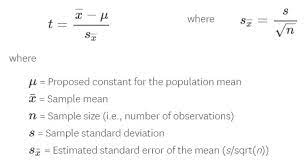

In [109]:
Image(url= "data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAoHCBQSExcSFBIYGBcXFxMbFxoYEhsXGx0dFxgbGxobGxgcHywkHB0qHhoYJjYlNi4wMzgzGiI5Pj0xPSwyMzABCwsLDg4OGhERFzIgFyAwMDAyPT09MDA9MjIyMDIyMDIyPTA9MDAyMjAyMjIyMj0yMjAwMjAwMDA9MjIyMjIyMv/AABEIAKYBMAMBIgACEQEDEQH/xAAbAAEAAwEBAQEAAAAAAAAAAAAAAwQFAgEGB//EADwQAAICAQIEBAUBBAkEAwAAAAECABEDEiEEIjFBBRNRYTJCcYGRoRQjUrEGFWOUosHR0vAzU3KCYpKy/8QAFAEBAAAAAAAAAAAAAAAAAAAAAP/EABQRAQAAAAAAAAAAAAAAAAAAAAD/2gAMAwEAAhEDEQA/AP2aIiAiIgIiICIiAiJleL8UmJdbpkYAC9DEVbBQPiALEsKHWBqxKXAZAcerQ6bva5CdQ0sVvcnY1Y9iDO/2/F/3F/8AtAtRKfiPGrgTWwJGrGoAqy2R1RQL92EcNxi5HyqoP7pwjEjYtoV9vWgwH1uBciIgIiICIiAiIgIiICJH5g1ab3q69rq5JAREQEREBERAREQERPm/6SYM+RlTEGACnsdDnIdJGpWBxugGoOb+LYE9A+kieAT2AiIgIiICIiBl+HeJjNkzIEYLiZVDFGXUdIZuqgCtQFde8tZONxKSrZUBHUF1BH2JlbwvgGw6wX1B8mV/ho3kdm3N70CqjpsstZMDEkjK6+wCUPypP6wJMOZHFoysOlqwI/IlDxHwleIZS75BpKEKr0tpkXIrFSCCQyL/ACNiX8SFRRYt7tpv6coAlTN4VjYlm8yybNZ8ij7AOAIFrBi0KFsmr3Jskk2ST9ZNM3+pcP8Aaf3nL/vj+psP9p/ecv8AvgR+M8A+dsChiqJlGRyCL5FbQACCDzlT0+WTcB4cmDWVZzrYs2tr3YkkjbuSf0HQADn+pcP9p/ec3++S8N4fjxnUuu6rmy5HFWD0ZiO3WBdiIgIiICIiAiIgJm+I4sjFQjMoYMrEH4dwwb/Cy7fxj0mlEDCHD5TqyMGVzjJUDJ0bWxVdjRoadunWevhz3kOprt6qwKLjRRLkWE9FHe/fciBk48OUZty2gNt1IK6KokvXxf8Axv7TWiICIiB8xwnimZ+Jcah5IGVlOmwBjKJpyKQHR9esjqGA2qps+H8YMuoh1YKaNIy0e45pYzYtalbK2OqnSw9wR0Mi4PhFwoEUtQ6ajf8Az/lwIuIyOGIUvW1ViDDp63vJuEZiDqJu+6ae3pctRAoZ+IzKxC4Ay7U3mqt7ehG28hycfmUW3Dqo9TxCAfkiW+I43HjZMbuA2ViqA/MQpavwplTichZ2cAMuEbAmgcjDcknoFQ/4z3ECMeLv/wBvH/ek/wBJqYmJUFhpJAsXdHuL7zG8J8XOZsQbCE83B5wptRUEqFDco3ayR/4Gb0BERAREQEREBERAREQMvx3Dky4vLQNzMoZlZQyqObUFYEPuApU1YYzMwZH4XHjxuLyMchKplVBbHJkvSxIUUpvfSDsNun08hfh0YhmRSRVEqCRXTeBIBQr+c6iICIiAiIgIiICIiAiIgIiICIiAiIgIiICIiBmeN8AeIwsisFyAq+Nj8r4yGRjW9WN/YkSbDwQGLyn5tSsHPTUXvWdulkn8y7ECknh+IZBkCAOqKgO+yrq0ium2pqPXmPrLsRARExOL4LMXYo1Czo5q2yCsl/8AiRqH1qBrYsoYEg9Cyn6qSD+oMlmM3h7hW0crE8RuGrZyxTf8fSMPAtY+ID94QGK8rEIEIVOWrVj3337wNmJneG8OyXq1CwoILKRYu2Gkd7G53NDYVvowEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREiyZAoLMQAASSTQAHUknoIEsSIOCSARYokXuAelj3o/iSwESpg4xHOkHfm6qVvSdLFSQNQB2seolq4HsTy4uB7E8uR4sodQw6EWL2gSxPLi4HsSIZFJIBFrsd+mwO/psR+ZJcD2JXfiUCM+oFVDWRv8N3072DO8b2LIo10NWPrRIgSxI3yKtWQLNCz39JzhzBwSOzOv3Rip/UGBNE8uLgexPLkWXMFq+7BR9T0gTRI2yKOpA3A3Pc9B9YXID+SNxXQ13gSRPLi4HsTy55qHrA6iIgIiICIiAiIgIiICYX9KtT4UwIAWzZcSUTQKhteQEgGgcaOPvN2RZcgQFiDQ/hUsfsqgkwMzwzg8qZs+TJorIyldLEkKqBVXcCgKY97LnpUt8PwpRidZax0LOf/ANOw/STcPnDi1DCjXMjIfwwBMngZA8L5ADu2u92JAU5hkYAdrCj8SHjuBYJkKgbDOwK/EwZHCpQHQWvf5B9tjHlVr0sDRo0QaPoaksDHHAtYbQgFpeO+VtKuCx5au3Xt8g9q5/q1+gKqdLDVd6bVwAnLY06gBvVDoDNmcJkDXRuiQfqDRH5gZWLw9lolVI1WUJXSeWgRpQCx9Nx9AJKvBMMeJCqtorUpPKeUjaxvRN7iakQMkcA2rZVHNjYNZJRUCgotiyDpI7bOfvEvhjKqgBTSYQ1EC2QOGY2pDfEOo/BAm3EDFXgHVWGnHbeUWIA+VEVlAZT3SxdzzD4Y4HNp1BcQU3daMjsSOUVysvQDpU24gZg4E+TkxaEGo5a9DrYkEituo9ekg4nw5zqChRZyENe5D42UKQB0BI71Sj7bUQKHFcIGRAFU6XVtJoDa77Hfcyq3hraTWkMTxFkdSMmTUoJo7Vsete82YgY2bhWXh3ULZZlNWD8yj5VAA27D1M9/YW1E6EKksfLJ5RaqoPw1fKe3zn77EQMHhOCfU6kC1y4T5hJ1UmLFq02OjEMOvzN95OH4HIumwvIvDLsxN+WW1HptswIHtNqIGDj8MyWSyo3/AETp2C6kZixACirDbXZ23M7fw1yGFKS3mhST8BfI7hl260y+m6CbcQMzh+CKOG2vXnLHuVdiVF19NvaRjwyzbKptuIJvew7EqDY3oV9JrxAwx4bksmwW08pLCgfJ0UeTUV1Wa1VvfWdcP4YwbnCldbsFNHY41WqVQvxKT07+s2ogV+DxlcaIxsqqgm73AAO8sREBERAREQEREBERATN8W1aAEwnLbbrrCj4Wotq2Zb0ivcdhNKIGH/RzgDhxAMrjIceIZGdyxZ1SmbTZC8xO/evQCaPDJkF6ze23OD/LGtfrLcQMNMDqoVUcLWNbNB1C6+W0ZS6jlHX5ibbeMWDMygscgYDhh8ZHzVl2DUeW99/Ub7zciBguuTUyXkJCZClOdj5rhCx1b8unrew3nWTBm6Aso1ZydINlmZShFOu1Fuu19ZtVvc9BgZniGHIxOkttiyadL6eexp2B379dvWRZ8GUEgF9GpvmZm3RKoh1atWvv1I2rpsxAws6cRzadd6HW76nyuVvj0glh2XY9/XS4XEys4JYralbYt23okk1faW5zYgdREQEREBE8BnsBETgODdEbdd+kDuJzfadQEREBERAROSa3nUBERAREQEREBERAREQEx/6ReZ5IGJnVzkxqCgsjU4UsdjyqCWPblo7XNiIGL4PlyHLxCN5hRcgGPXZ2CKGOo/xPrIA2AHawJd4XJkLEOtCtjpUd/bI38hLsQMBHKXpLEkC30lSCXArIGBGrc81HYHbpOsfE5mW7IKqnyXZ81lN2oPwqp2A63tNyewMXJxDq4xtkZRWam0KWOnytPy187DYb0O8gGfML2CFmDOTsA3lYqUHS+xOrt8tXc3dA1Bq3AIB9jRI/wj8SSBl8XncBDZBK2wVdy3LsNQ6deWw34Mq/tGQUFJVgczaNKhWrI4VRy3bECyD0F95vRAyeFzZDjdiwYhbSrJ1aSaPIo61tRPrOuDcKSFHL5WDQa+Ik5Ord+x+995qSPHjCigKG+31NwM3wviMjWcjDcJQANhjq1A8i10G25G9ncSxnzFhjOM7O4BYLfLpY3uNtwJenCqAKAoDpAyF4vILVrv8AdBeTr++dXOw/gCk9hd7TxsubSW1sDp4hgNC9cb0gHL0IO/c1tU255AwxlyIcmiyxyZSEKbEaCQbq/iAF3W9dZJgzZWKjVas5BZRZA8tmokooHMB27kGbEQM3i8zhyASKCaFCghyWIYE1ewroRXUyPAr48OzNZyPqYouoKchtqC0dt7IPW+k14gYD5H1a9bCseUIwxgl6ddII01vXQAX1FTvJxWUFqst6UNKDWgO+nUCFZjfMDpJ6bTciBj4nzNy+ZvochgoILBqWyUF7daAvtIOJ4/Lp1qGWxkZVK1sgUaTysSS2o1tY7ipvxAxGyZFvSWyMMmUhWUHSPLcppIUEAnSLvvXededkZkRXYqWUF9C2Lx5WYDloUVTevmqbMQMbDmdmxhySHRQy6BW6EsWBF1fcGt6Il7w1icSEm+UUT1I7E/UUZPkQMCp3BBBHses6AraB1ERAREQEREBERAREQEzvGOLbFiLIAcjELjVjQZ26L6XQPUgbbkdZoyN0DCmAIPYix+DAzPCePfJw/msDerIArLTAK5UBtGoE7fEtg9RtJ8udjjLAhGsAatSjdgKtlBF3V0avvLwFbCGUEURYgY7+IFAQLJVjrDEEgagKD2ARvsd29Rdzv9uyHoEG/EVYY15T6d997/T3micCUBpWhdDSNr616TvQPQd+3r1gZLeIM2utNB0TSCdfPiR7u+2smq6KTHC8a50KFsAYgxLLZ1oDqstffppN0Zo4uFRWZwo1MbJrf4VWh6ClG07GFQQQosCgaGw9B6CBm8bxjr5gUqtBtBKlt1UMSSDV7nlNHa951m48o+nlYWVYgVzDEX7tfQDYA7Hr2mgcS2W0iyKJoWR6E+k8/Z0/gXYADlHQdB9IGcnHOSqEKC4xEGjS61yGiL5v+mRdi9Q+8PD+IMoUWG/eEN3+PO6KQxYbbbABulbdZsHEpFFQQQAQQCKHaeeSn8K+2w7m/wCcDMbjXZLtFvHkezfRaFXfXeye22x6yweIYBFBALIzFmsjlC2Oo3Oq79j1lw4lNWAa3FgbH1HpDY1NAqCBVWAenSBkcHx2RlRVQGkRbZhuxxBwbLWdzVafU3Oh4nqIYCkIfSSTuQE6qDvzMV+qnpNYYlsNpFgUDQsD0v0jy1qtIrfsO/X8wMheOdmolQFTiNa1uTjKAEFWOnZvU/6Srx7BQ1LVhdNktfl67sn9PTe+00PITbkXbpyjbav5bTrylu9Iuquhdel+ntAqcFxLOSGA+DG4038+rbfrWnr79BL84CgdB6fp0ncBERAREQEREBERAREQEREBERAREQEREBKPifGeTibJoLEDlUdWPYAdSfYWdtrl6VuJ4ZMgAZbpgy7kEMOhBG4PXcesChwHi/mYhloUXyAc+jZGK2Veip23U7g9ZocTxK41BboTXUf5kShxfg4fQoKqib6PKVgxpxuT1+Mmje4BN73rVAz+L4s+Wjp8zouwDGiaNC6ueZOOZeXTZ0kguwTUaY0BW9VvW49Jbz4FcaWBqwRTFSCOhBUgicLwaWDRsersb9zZ3O/U7wKi8e1qCvMwxcoYaQcnmG9VX8u/6e/Q8R2spVhiLYdVdUYHbbmYVVk+l7SynBotELuNNEkk8urTuT21N+YfhEIAK9LqiQRbBjRBsHUoN+0CmPFDu2jkVHZtzqtHZCAuncWvt1kuPjix0jGdXNsSVFLpsgsoJ+NR0639ZKOBxjbTtzCrNEObYEXuCSTv3Nx+xJQFHqTetid9jbXdUAKuthArY+OIw4nYWXRGZiwQXoBNmqBPboPcT0cewViyLtkdVAc2Qt71pu6HQX17CWm4NCqrp5QNIAJG1Vp2O60Bt02njcEhN6e97MwF1R2B2B7joe9wK6eIg76DoBUFid7ZFcbelMAf85z+3tqsqADjRlBcblmIFkC7rsL9rlzHwqKKCirU+u6gKDv7KB9pGvh+MdF9ADqNgKbUKbtQLNAVW8CBPEwwsIfhxk2a3d2RQP8A2X22/E9x8YyjM2QfA4AUc23l4zQNC7Zj+ZYXg8YBUKKIAPXoCzAe1FiR9Z0nCqFZdOzfFZLatgtkncmgB9oFfDx5ZlTQQx19SQKTRZBIBPxjt1BHvOMXimpPM0beUmRubcI4JG1btytt7dd5bx8MqkMBuNW5JY82m7JJJ+FfwJz+xY6VdOyqFABIGkdFIvmX2NiBynGAo+QilQ5B1sny2ZW2+q7bytn4rJqTGF0sXTVT/IyuQQdJ3tDYrt13uaAwqFKgDSSxIqwdRJa/qSfzOMfCotUNwbskk3RA3JvoSK94FLi+MyAuAopcnDqpDbkO6BgQRQ2Yi7nR8UrbQSRq1AW1aXZeWl5iSpobdO0ttwyE6iu50k7mrQgqaurBA39p43CId9PdjsSL1G2Bo7gnejtAi4rjfLYjQW0qrNuBsSV2Hc7e0hyeJ6SVOMll1Wq22yhTykLuSHFCh33l58CsSSoNgKfcA2B+SZG/BoxsruSSSCRdgAg11BCrY6bCBXy+KBSw0E0rsKN3oKgg7UDbDaz3upJk4whMjaabHYI1WCdAYb7bUw/WdngMdk6eurua5zbULoWQCffeSvw6sHUjZ71e9qF/kAPtArNxJRlxnmJC2zEJquwdIqmIokjahXWRY/ECoBcbMC9kheVizKqiuYhQLF3v3k78AGWmJLFdJbcXtpLaboNVi5I/CIWDEbiu5rbpY6Gu220CuePYHScdE+XXOCP3hYCzWxGnfr12ucDinblIVC2UoCratlDMTRAokLX39pPj8PRXLgdkABJNaCxFEnpzbDoJ1l4NTuvK2oMDuRqG16brcEg9LuBXz8YxtUFczqrWPiVS5ta+C1KE9b/Mm4bOWci7VkR1vqNWxH02B/8AYzrNwaspUbXrFjqA7W9ehO+87xYNLM19QoAqgAt0PyWN+/tAsxEQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERAREQEREBERA//9k=",width=500, height=400)

In [88]:
ages = [10,20,35,50,28,40,55,18,16,55,30,25,43,18,30,28,14,24,16,17,32,35,26,27,65,18,43,23,21,20,19,70]
len(ages)

32

In [89]:
import numpy as np
ages_mean=np.mean(ages)
print(ages_mean)

30.34375


In [91]:
## Lets take sample

sample_size=10
age_sample=np.random.choice(ages,sample_size)
age_sample

array([30, 43, 55, 19, 18, 14, 26, 24, 19, 16])

In [93]:
from scipy.stats import ttest_1samp


ttest,p_value=ttest_1samp(age_sample,30)
print(p_value)

0.4088529308721275


In [94]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

we are accepting null hypothesis


# Two-sample T-test :

The Independent Samples t Test or 2-sample t-test compares the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different. The Independent Samples t Test is a parametric test. This test is also known as: Independent t Test


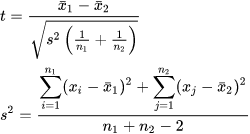

In [108]:
Image(url= "data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAPoAAACGCAMAAADD0me1AAAAYFBMVEX////Pz885OTkAAABeXl5+fn6/v7/h4eEnJyc/Pz/v7++rq6ve3t6fn5+Pj4+vr69PT09vb28vLy8PDw9GRkYfHx+EhITl5eV4eHhqamqkpKS3t7eamprJyclVVVX39/cZdjUOAAAJe0lEQVR4nO1di5bbJhCFCmihw0uqkqZt2v//y/KQZYGellYy3vU9e7KJgiWugGFmuGCE3tgB+MPj22IZEcr8eVGNroNgCGFxvMzrQVpac9WulFG1pe0n444pQpW2jfurmKMG1pWRtALX+vjKyp0LEIhVQgAC2rLbRUU7yPBP905wBa6MoKxWT6vqCaB1/M176ph16Ns4jghVu/d0dfVOA2hUuz7vm/dOPYNQyBBfRmDEmitrdypMC5VCUqMF6rYRDUWMhvLyurqdDGkI4ySwmqWuuStjQxlZInN9+A6z1O9wzMszc84EH7wDq+nazIVbzuuDj/l4rDglGzA06DOADWWuBjDO2SdztjbCuVqExh7fz8nFtc9JuA91SVNX7NNjaajz3y4Ev45zB+9tRcCow3//9UJ8v5x64ybcaOa+XIevGLbPrsOToKIvuglC/n4ajvuUp0Ibchp+PJvcMuxRl/d1QdaLfFZ8XepsYdLbPRReYwwthKZkt9tvXiJgMLP/Y/c7QaJ+hXafpc7mX8o6WHkpjBHwXIZJtIcajpeXucqh5jJwdNjoYlPfHxZiTfGpktle3Q6cUEU2BJ+MJssR5a/LDKgLakjfVDrhwTbF3clHbOmjHQ/CHMPQPeohSXfYQf14TvhkyMFQpxrRnmKbhH47qKOq8AQBSY0R76tbJfHmBPWJqDilXheeMUitnOz5sCqx/Huo8+vzco8AupahljiqWqIbYV0Nu4M07Yjp6AKzlR2+L1q2ndOxWyuCNEeYU3rrpHR13Xw1DbR+i6eiS1Nwg5lGlvN+rPf1/smGGHx0SP3XpND37BZlAf6Jv7uhTquqTu1dX2/yxxDxGvMJXh7SvPHCX0mhv7NblAUTOYuYpgDAqkmdr0/b4XUTV2d07N+NexE8TZ5+WuqERgPepSm4ZDRLU+lqLdmwSn2L3/8EsOix3GZ1JnOi+D6vY4GmoruUOgDCmeNaH4n3T0QVRUDzBfqxr2mt5ETB9HUQbjVPLWW1fRXkUtS+N7KFuJLfRgDTxDtzYJdGAIALz2sh5D38z/zBckC8DVoSy6jeF7MSUfeO6CIT7F5O7Rw61A9wVaqiTnoztjQYoY85a3A/aoW6Uu7H9XDozSUpNb+PfUi5aIfMbagS3/BihbobDlpJJNRtvEOp/d0ZIZKkKcbAmTBjmXoH2y9oFDq1efB6PiMZYdNkBaXrWRfoBQzQlJujcb7WymA8tIxACk5K6oqt2SHMd+eTdak2zgMqsppAwrtFEYV6Mx3apnC1x3kwVfHLI2eh8NTZmWCF54rfeOONN9544403HoFgiF2bUWEAZezHopZge2UoI1UrD4nyPgyMY0TYhSK/kN42iCnz9ExOE37Qdck0K5FViGL97LDeN4CRcCF1n972Kk377KSt1Aj8WL+OOnEGRgmkdRG2Dl1JPQITWkjuEl88w/kHltLqXwuct1WGc7PIkvP8gU9SUNOqGqapmOIfURNB7dysBU3yANCkqT5iwCtrH623a4PUj2Pt8ZoYPL8RQFdVak4FOXy+gmMuH1/YFa4VUpdKxJrtW32I66x2KDPOYau8mTsnep97o4NEQNGNAuYhWN4KLrZwf8C+mQ5u6js+q4oWdZUrlAJ1sm9+EXV3M/t4gtm1wsT75js3a3VCLLnQ+3BTTZxZtnuRTna91OywUa4VRi98c1z1zWPQwiIMHyzRnKQUeUFHNb795j1G/4RHDi6E43OwnVR5rSAzugGbj1cKmtifgwt+GwW2jA3p5r3KVKNdAnhz2PhzpNV171EYtmtFRY9boQn3BkKwJov2jhqJk1Hm7dtQZuyR7+QWbdVkA6obKMpQnIsXM0hDhR1uYPAHgFH3xF1mkuRGVwSJpyBCN4ouzT0Eo9awZtAIekIdOqoUHqmRo3CHYlTXuFnqulQjXuPhDHxoj83I6MZD5Fwc64h4hYiYaQiQfqOINwxwO4dr6vy5cXtkrpQbsL6McIRaBcFgzYXy1G8sAQOIUdO9okN6JZxZ+b7+NppPcev0vmMFmHvR0Hz9ARGQUle+cJt8IiD3Gnn/8a4NMB7cIOBWVASqwripIjb3MalWJnfq6+9P3RO5JjSBX6r2JG7K+G2t7qqdDvYbddnpDGF+cvVDSjjHAzqLJA5Rl9nIQ6EprfHaN6acrzTjluoG1STu/b9Rn9JIjqmLOjOewelnLRge1HxYzuwChwb7rYNhTEDsOOyIRALnzFHtX2Rtba2YM6aMzMx1iitu8A9fyxt1OuERjKnX+Q2DY6Jqxjn2bh2b86lYo02Lo0KtezvyQAyA29FjAhGgIIL1ErM3VxppBf0n0LQHO6I+FjBB6CwuCmGdOm9OYOsqhGMRi0V88v4wu/eCh9cSstKq1T7VUcdTMW8+Fu1EZTP3Yd2dpIoF/abYr00UeecLsVByYMGGBQpquvMoN7iBMguNROhiKdfVrB3cjP6OsOWGXNYooku575iKLUGIzi1LtCRD11dvF2rCyE5tRh7hs7Z7i7u60Yb3hbOwTZBm9Nlmzq6OAbuZqyFz8Amq1e0+xwCJTWWSNCdnA+cg8xyhc65PfaD3mXM85xwXOsa5yXg28cRTH/jGGymSXSDXrPoOTwZ55qHTeGBlpLpkyXHgSdAHTkP8aIg0R3EF9cSQPtHKURf/qN62X0HdKiI62w5nUsdy2dsBSLLAF1AHkEka8yzqlOlxRJrAh0jdOQtwUYd3QVr3RHEi9VahFTtCnFG/mHorxAXUsUBmOfxTamjhiTnf6sDQVXbB7mmz2zj59FxgLC+y6WLPKtyZUOaiGvmkfiEqpQsh/JqcF658OeqYs8x4fplvRuAamTRh92UOiq8bs5pG/feXz4b/PC1smtXMD/508Ky8LKJNc01fpMOLBo/OmvgqUJaSp28xeGMLmGk3fJHYS+BBGthvDij3IJuH8GCIQv1sNKGmKxgaEOipOXRAHbRAa6J/zZ1hyhWrRcPqilrWTvhOd+rCEG7logQtAko9pG0SJFQ3Cr/Str+zUMw2EAUvWC1NOqawzMIiBATBUyO9qqwny3u9WOgNEL/81BXUDPcdpJeE9XHlSMpUOPxx4vGc4SxMHPwriLv8N425tzMvk/da6pdyRLxgk3BPdJ560LlVmjEQkyqagPBlXK9k5oK2kVN/0No8da+4ZFWQus1+vQRuXN+vX8nMYT8Ty5DuXqCuvZn3J1OKWd9a8t42vB7mqd+hXI+/pDKXQm7Qo9sq10O/8ZH4H/h3XmkArQh1AAAAAElFTkSuQmCC",width=500, height=400)

In [ ]:
# practical implementation

In [98]:
np.random.seed(6)
school_ages=stats.poisson.rvs(loc=18,mu=35,size=1500)
classA_ages=stats.poisson.rvs(loc=18,mu=30,size=60)

In [99]:
np.random.seed(12)
ClassB_ages=stats.poisson.rvs(loc=18,mu=33,size=60)
ClassB_ages.mean()

50.63333333333333

In [137]:
_,p_value=stats.ttest_ind(a=classA_ages,b=ClassB_ages,equal_var=False)
p_value

0.00039942095100859375

# Anova Test(F-Test):

The t-test works well when dealing with two groups, but sometimes we want to compare more than two groups at the same time.

For example, if we wanted to test whether petal_width age differs based on some categorical variable like species, we have to compare the means of each level or group the variable

In [ ]:
One Way F-test(Anova) :-

It tell whether two or more groups are similar or not based on their mean similarity and f-score.

Example : there are 3 different category of iris flowers and their petal width and need to check whether all 3 group are similar or not

In [107]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRb6TyUjnCxdxQ8mluIp77amjARdrFxbZcaOQ&usqp=CAU",width=500, height=400)

In [ ]:
ANOVA Reference:https: //towardsdatascience.com/1-way-anova-from-scratch-dissecting-the-anova-table-with-a-worked-example-170f4f2e58ad

# Bernoulli Distribution and Binomial Distribution:

In [ ]:
Bernoulli Distribution

Bernoulli Distribution is a special kind of distribution that is used to model real-life examples and can be used in many different types of applications. A random experiment that can only have an outcome of either 1 or 0 is known as a Bernoulli trial. Such an experiment is used in a Bernoulli distribution.

1.Bernoulli distribution is used when we want to model the outcome of a single trial of an event.
2.It is represented as X∼Bernoulli (p). Here, p is the probability of success.
3.Mean, E[X] = p
4.Variance, Var[X] = p(1-p)
5.Example:
Suppose the probability of passing an exam is 80% and failing is 20%. Then the Bernoulli distribution can be used to model the passing or failing in such an exam.

In [104]:
Image(url= "https://d138zd1ktt9iqe.cloudfront.net/media/seo_landing_files/bernoulli-distribution-graph-1634631289.png")

# Binomial Distribtuion:

1.If we want to model the outcome of multiple trials of an event, Binomial distribution is used.

2.It is denoted as X∼Binomial (n, p). Where n is the number of trials.

3.Mean, E[X] = np

4.Variance, Var[X]= np(1-p)

5.Example:
Suppose the probability of passing an exam is 80% and failing is 20%. Then if we want to find the probability that a student will pass in exactly 4 out of 5 exams, we use the Binomial Distribution.

In [105]:
Image(url="https://www.investopedia.com/thmb/7hBeDIzmMc1T-QC0uGh0D7yaHNw=/500x0/filters:no_upscale():max_bytes(150000):strip_icc():gifv():format(webp)/DDM_INV_binomial-distribution_final-fdc10a4db5944325af9e4e584800559a.jpg")

# Power Law Distribution:

A Power Law is a function f(x) where the value y is proportional to some power of the input x: f(x) = y = x-α If the function decribes the probability of being greater than x, it is called a power law distribution (or cumulative distribution function - CDF) and is denoted P(>x) = x-α .

In [106]:
Image(url="https://janav.files.wordpress.com/2013/09/powerlaw.jpeg")

# Author: Dharavath Ramdas

GitHub Link:  https://github.com/dharavathramdas101
        
Linkedin link: https://www.linkedin.com/in/dharavath-ramdas-a283aa213/